# Starting Analysis of Simulation Output - ROV, ASPA, PeerROV

## So far the scenarios and policies for ROV, ASPA & PeerROV have finished, still working on ROV++
- Dataset is found at `./dataAnalysis/consolidatedData.csv`

## Activate Environment

In [116]:
using Pkg
Pkg.activate(".")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("CairoMakie")

  Activating project at `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience`
   Resolving package versions...
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Project.toml`
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Manifest.toml`
   Resolving package versions...
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Project.toml`
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Manifest.toml`
   Resolving package versions...
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Project.toml`
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Manifest.toml`
   Resolving package versions...
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/Project.toml`
  No Changes to `~/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1C

## Necessary Imports

In [177]:
using CSV
using DataFrames
using Statistics
using Plots
using CairoMakie

## Set var for csv path

In [22]:
csv_path = "./dataAnalysis/consolidatedData.csv"

"/Users/SEBARRETT/AU/INSURE/Iowa_Workshop_6_2024/Project/Code/group1Code/DataScience/consolidatedData.csv"

## Seeing which deployment type for any policy against any scenario works best

In [59]:
function calculate_victim_success_rate(csv_path::String)
    𝒟 = CSV.read(csv_path, DataFrame)

    all_results = DataFrame()

    𝒫, 𝒮 = unique(𝒟.AdoptingPolicyCls), unique(𝒟.scenario_cls)
    for policy in 𝒫
        for scenario in 𝒮
            𝒟ᶠ = filter(row -> row.AdoptingPolicyCls == policy && row.scenario_cls == scenario && row.outcome == "VICTIM_SUCCESS", 𝒟) 

            𝒢 = groupby(𝒟ᶠ, :deployment_type)
            𝑅 = combine(𝒢, :value => mean => :victim_success_rate)
            
            𝑅[!, :AdoptingPolicyCls] .= policy
            𝑅[!, :scenario_cls] .= scenario

            all_results = vcat(all_results, 𝑅)
        end
    end
    all_results = select(all_results, :AdoptingPolicyCls, :scenario_cls, :deployment_type, :victim_success_rate)

    return sort(all_results, :victim_success_rate, rev=true)
end

println(calculate_victim_success_rate(csv_path))

64×4 DataFrame
 Row │ AdoptingPolicyCls  scenario_cls         deployment_type   victim_success_rate 
     │ String15           String31             String31          Float64             
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │ ASPA               SubprefixHijack      MULTIHOMED                  98.9381
   2 │ AS-Cones           AccidentalRouteLeak  MULTIHOMED                  98.828
   3 │ AS-Cones           AccidentalRouteLeak  INPUT_CLIQUE                98.732
   4 │ ASPA               PrefixHijack         MULTIHOMED                  98.7136
   5 │ AS-Cones           AccidentalRouteLeak  STUBS                       98.6348
   6 │ ASPA               PrefixHijack         STUBS                       98.6082
   7 │ ASPA               SubprefixHijack      STUBS                       98.5811
   8 │ AS-Cones           AccidentalRouteLeak  NoDeploymentType            98.421
   9 │ ASPA               PrefixHijack         INPUT_CLIQUE       

## Seeing which deployment strategy has lowest attacker success rate

In [89]:
function calculate_attacker_success_rate(sv_path::String)
    𝒟 = CSV.read(csv_path, DataFrame)
    
    𝒟ᶠ = filter(row -> row.AdoptingPolicyCls == "ROV" && row.outcome == "ATTACKER_SUCCESS", 𝒟)
    
    𝒢 = groupby(𝒟ᶠ, :deployment_type)
    𝑅 = combine(𝒢, :value => mean => :attacker_success_rate, :deployment_type => first)
    
    𝑆 = sort(𝑅, :attacker_success_rate, rev=false)
    
    return 𝑆
end

attacker_success_rate = calculate_attacker_success_rate(csv_path)
println(attacker_success_rate)

4×3 DataFrame
 Row │ deployment_type   attacker_success_rate  deployment_type_first 
     │ String31          Float64                String31              
─────┼────────────────────────────────────────────────────────────────
   1 │ NoDeploymentType                22.4227  NoDeploymentType
   2 │ INPUT_CLIQUE                    32.2977  INPUT_CLIQUE
   3 │ MULTIHOMED                      33.4534  MULTIHOMED
   4 │ STUBS                           34.1367  STUBS


## Finding most efficent deployment type for ROV

In [151]:
function calculate_mean_ROV_victim_success_rate_by_deployment(csv_path::String)
    𝒟 = CSV.read(csv_path, DataFrame)
    
    𝒟ᶠ = filter(row -> row.AdoptingPolicyCls == "ROV" && row.outcome == "VICTIM_SUCCESS", 𝒟)
    
    𝒢 = groupby(𝒟ᶠ, :deployment_type)
    𝑅 = combine(𝒢, :value => mean => :victim_success_rate)
    
    𝑆 = sort(𝑅, :victim_success_rate, rev=true)
    
    return 𝑆
end

println(calculate_mean_ROV_victim_success_rate_by_deployment(csv_path))

4×2 DataFrame
 Row │ deployment_type   victim_success_rate 
     │ String31          Float64             
─────┼───────────────────────────────────────
   1 │ NoDeploymentType              75.4654
   2 │ INPUT_CLIQUE                  66.9428
   3 │ MULTIHOMED                    63.2855
   4 │ STUBS                         61.028


## Bar graph for deployment type variability with ROV

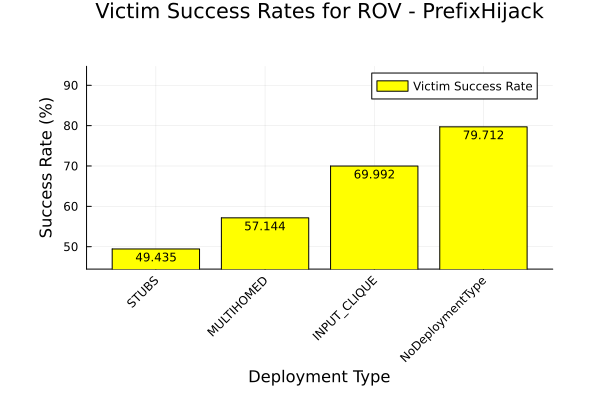

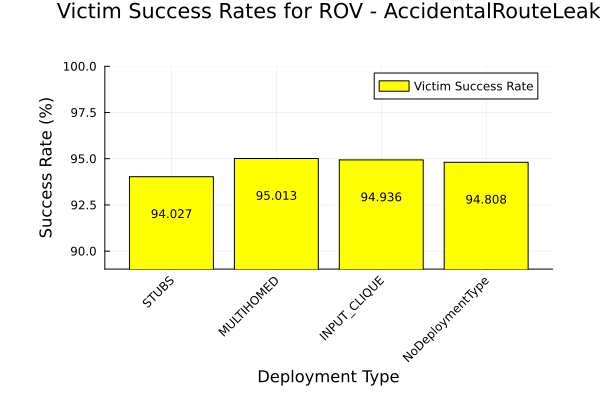

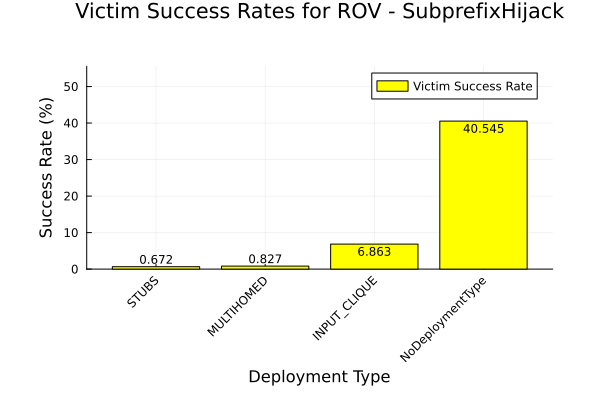

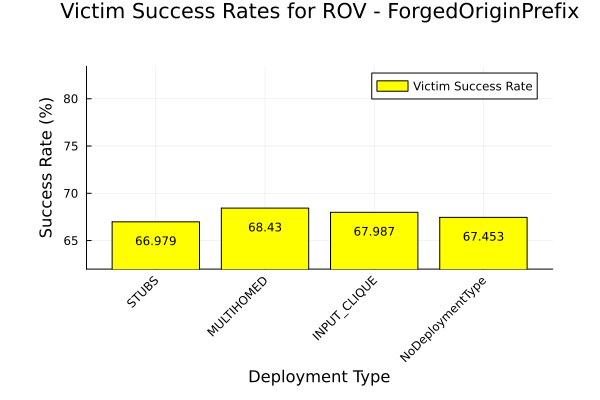

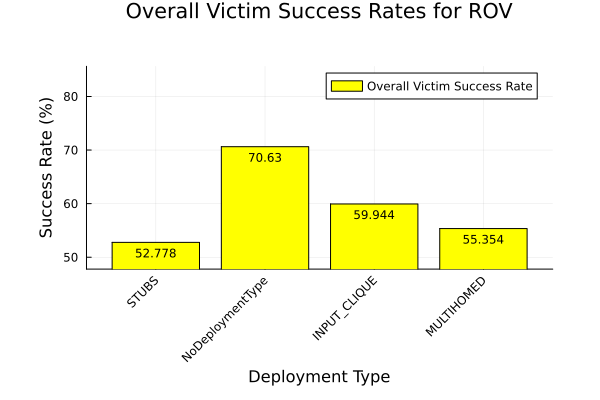

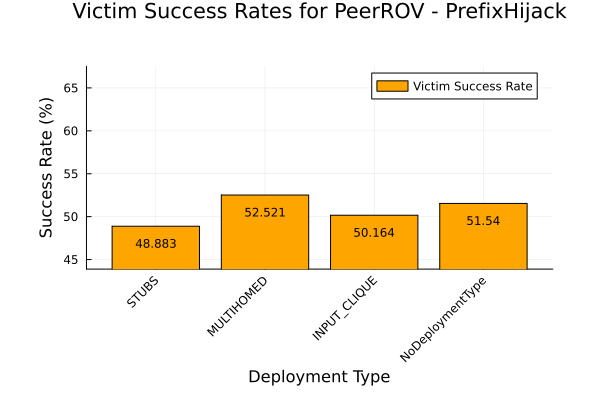

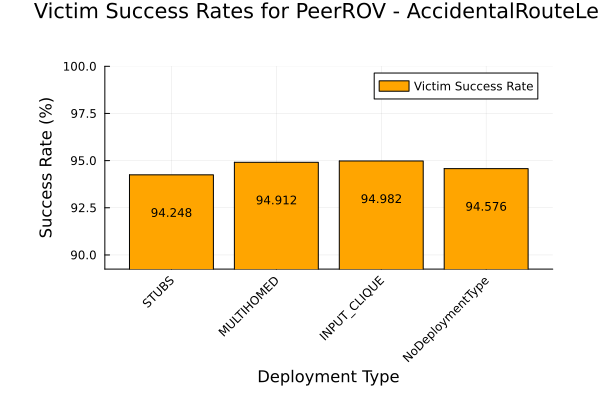

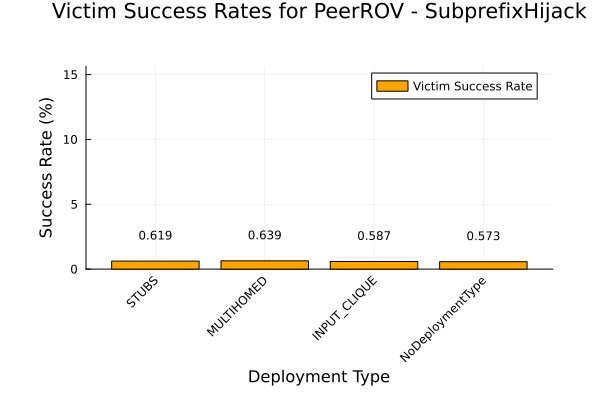

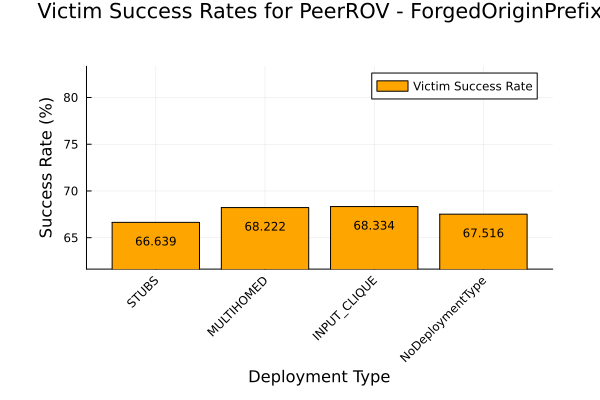

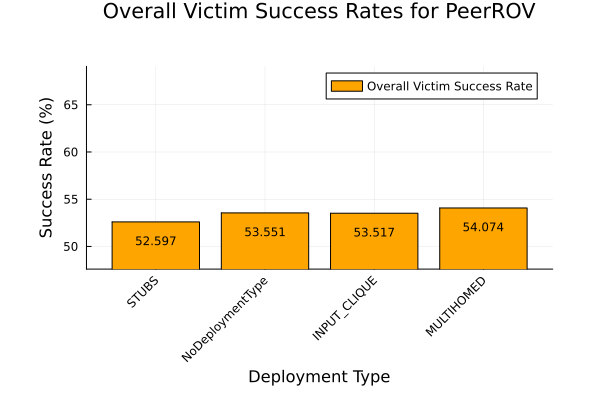

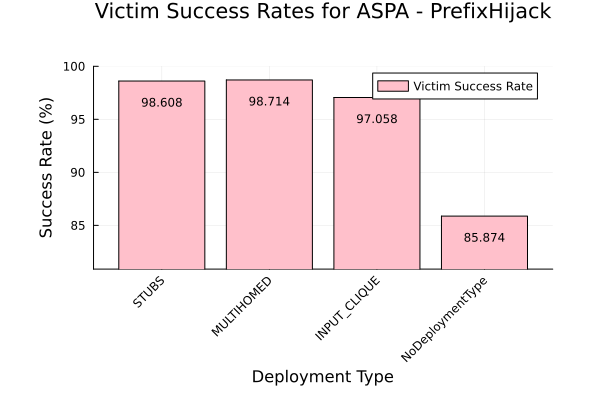

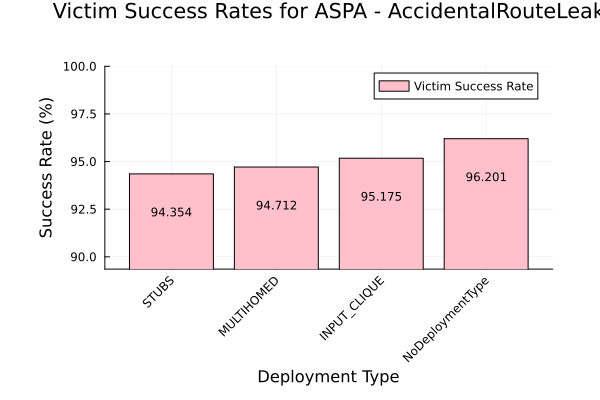

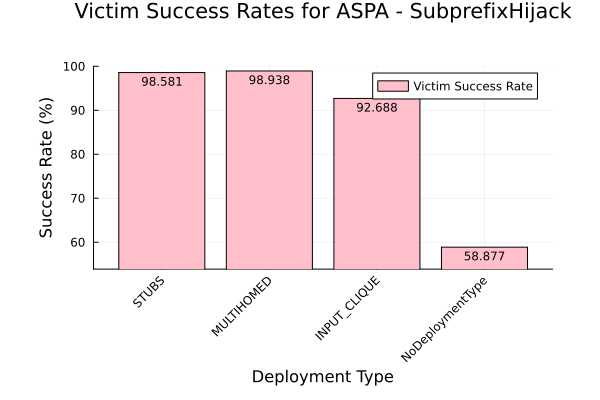

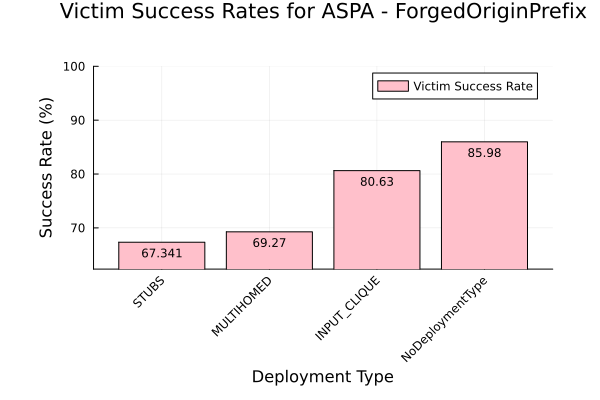

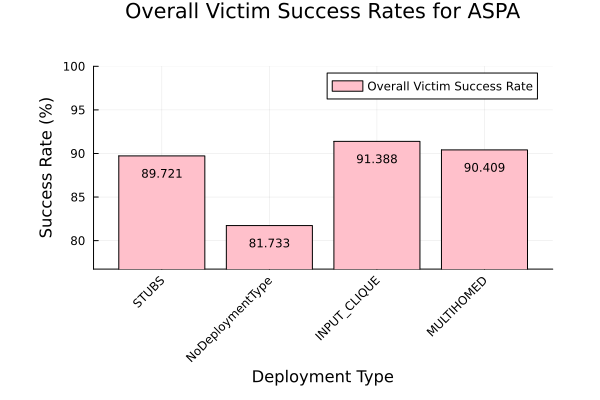

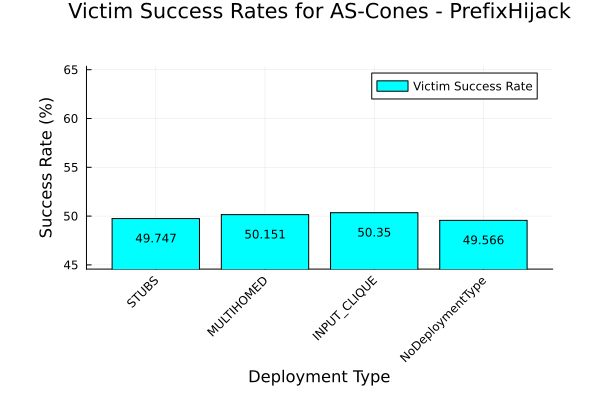

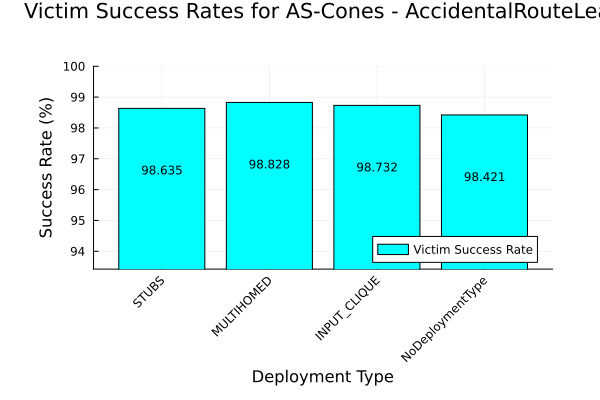

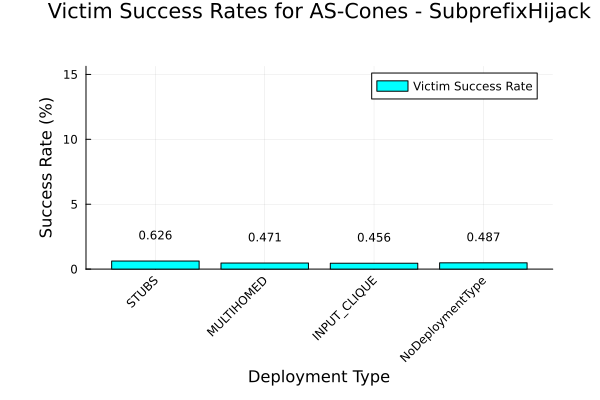

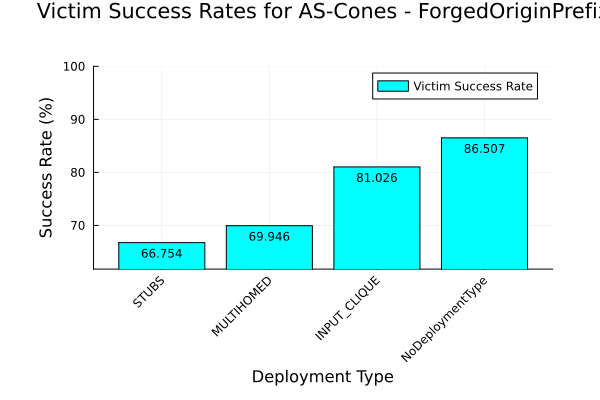

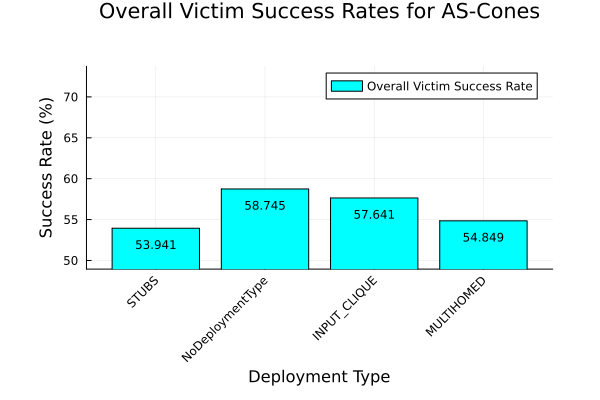

In [136]:
function barGraph_𝑣ₛᵣ(csv_path::String)
    𝒟 = CSV.read(csv_path, DataFrame)

    graphs_dir = "./barGraphs"
    isdir(graphs_dir) || mkdir(graphs_dir)

    𝒫, 𝒮 = unique(𝒟.AdoptingPolicyCls), unique(𝒟.scenario_cls)

    𝒞 = Dict(zip(𝒫, [:yellow, :orange, :pink, :cyan, :magenta, :yellow, :black]))

    for policy in 𝒫
       𝒟ₜ = Dict{String, Vector{Any}}(
        "NoDeploymentType" => [],
        "INPUT_CLIQUE" => [],
        "MULTIHOMED" => [],
        "STUBS" => [],
       )
        for scenario in 𝒮
            𝒟ᶠ = filter(row -> row.AdoptingPolicyCls == policy && row.scenario_cls == scenario && row.outcome == "VICTIM_SUCCESS", 𝒟)

            𝒢 = groupby(𝒟ᶠ, :deployment_type)
            𝑣ₛᵣ𝒟 = combine(𝒢, :value => mean => :𝑣ₛᵣ)

            for row in eachrow(𝑣ₛᵣ𝒟)
                append!(𝒟ₜ[row.deployment_type], row.𝑣ₛᵣ)
            end

            𝑦ₘᵢₙ, 𝑦ₘₐₓ = minimum(𝑣ₛᵣ𝒟.𝑣ₛᵣ), maximum(𝑣ₛᵣ𝒟.𝑣ₛᵣ)
            𝑦ₗₘᵢₙ, 𝑦ₗₘₐₓ = max(0, 𝑦ₘᵢₙ - 5), min(100, 𝑦ₘₐₓ + 15)

            bar_plot = bar(𝑣ₛᵣ𝒟.deployment_type,
                           𝑣ₛᵣ𝒟.𝑣ₛᵣ,
                           label="Victim Success Rate",
                           title="Victim Success Rates for $policy - $scenario",
                           ylabel="Success Rate (%)",
                           xlabel="Deployment Type",
                           legend=:best,
                           color=𝒞[policy],
                           xrotation=45,
                           margin=10Plots.mm)

            Plots.ylims!(𝑦ₗₘᵢₙ, 𝑦ₗₘₐₓ)

            for (i, val) in enumerate(𝑣ₛᵣ𝒟.𝑣ₛᵣ)
                if val ≥ 5
                    annotate!(bar_plot, [(i+0.5-1, val - 2, Plots.text(string(round(val, digits=3)), :center, 8))])
                else
                    annotate!(bar_plot, [(i+0.5-1, val + 2, Plots.text(string(round(val, digits=3)), :center, 8))])
                end
            end

            plot_filename = joinpath(graphs_dir, "$(policy)_$(scenario)_Victim_Success_Rates.png")
            savefig(bar_plot, plot_filename)

            display(bar_plot)
        end
        
        𝑂ₘ = Dict{String, Float64}()
        for (deployment_type, rates) in 𝒟ₜ
            𝑂ₘ[deployment_type] = mean(rates)
        end

        𝑦ₒₘᵢₙ, 𝑦ₒₘₐₓ = minimum(values(𝑂ₘ)), maximum(values(𝑂ₘ))
        𝑦ₒₗₘᵢₙ, 𝑦ₒₗₘₐₓ = max(0, 𝑦ₒₘᵢₙ - 5), min(100, 𝑦ₒₘₐₓ + 15)

        overall_plot = bar(collect(keys(𝑂ₘ)),
                           collect(values(𝑂ₘ)),
                           label="Overall Victim Success Rate",
                           title="Overall Victim Success Rates for $policy",
                           ylabel="Success Rate (%)",
                           xlabel="Deployment Type",
                           legend=:best,
                           color=𝒞[policy],
                           xrotation=45,
                           margin=10Plots.mm)
        
        for (i, val) in enumerate(values(𝑂ₘ))
            if val ≥ 5
                annotate!(overall_plot, [(i+0.5-1, val - 2, Plots.text(string(round(val, digits=3)), :center, 8))])
            else 
                annotate!(overall_plot, [(i+0.5-1, val + 2, Plots.text(string(round(val, digits=3)), :center, 8))])
            end
        end

        Plots.ylims!(𝑦ₒₗₘᵢₙ, 𝑦ₒₗₘₐₓ)

        overall_plot_filename = joinpath(graphs_dir, "$(policy)_Overall_Victim_Success_Rates.png")
        savefig(overall_plot, overall_plot_filename)

        display(overall_plot)
    end
end

barGraph_𝑣ₛᵣ(csv_path)
println("Oh 🍯")

## Graph Constants

In [ ]:
const DEPLOYMENT_TYPE_MAP = Dict(
    "STUBS" => 1,
    "MULTIHOMED" => 2,
    "INPUT_CLIQUE" => 3,
    "NoDeploymentType" => 4
)
const DEPLOYMENT_TYPE_NAMES = Dict(
    1 => "STUBS",
    2 => "MULTIHOMED",
    3 => "INPUT_CLIQUE",
    4 => "NoDeploymentType"
)
const PERCENT_ADOPT_LABELS = ["1e-6", "0.1", "0.2", "0.4", "0.8", "0.99"]


## Data Processing Function

In [192]:
function process_data(csv_path::String, save_dir::String, processing_function::Function)
    𝒟 = CSV.read(csv_path, DataFrame)

    isdir(save_dir) || mkdir(save_dir)

    𝒫, 𝒮 = unique(𝒟.AdoptingPolicyCls), unique(𝒟.scenario_cls)

    𝒟.percent_adopt .= replace(𝒟.percent_adopt, "SpecialPercentAdoptions.ONLY_ONE" => "1e-6")

    𝒟.percent_adopt = map(x -> x isa String ? parse(Float64, x) : x, 𝒟.percent_adopt)

    𝒟 = 𝒟[𝒟.outcome .== "VICTIM_SUCCESS", :]

    𝒟.deployment_type = map(x -> DEPLOYMENT_TYPE_MAP[x], 𝒟.deployment_type)

    for policy in 𝒫
        for scenario in 𝒮
            policy_str, scenario_str = String(policy), String(scenario)
            filtered_𝒟 = 𝒟[(𝒟.AdoptingPolicyCls .== policy) .& (𝒟.scenario_cls .== scenario), :]

            processing_function(filtered_𝒟, policy_str, scenario_str, save_dir)
        end
    end
end

process_data (generic function with 1 method)

## 2D heat maps for adoption rate vs deployment type vs success rate

In [202]:
function generate_2d_heatmap(𝒟::DataFrame, policy::String, scenario::String, heat_maps_dir::String)
    if nrow(𝒟) == 0
        println("No data for policy $policy and scenario $scenario")
        return
    end

    agg_𝒟 = combine(groupby(𝒟, [:percent_adopt, :deployment_type]), :value => mean)

    𝑝 = agg_𝒟.percent_adopt
    deployment_type = agg_𝒟.deployment_type
    victim_success_rate = agg_𝒟.value_mean

    𝑝 = Float64[𝑝...]
    deployment_type = Float64[deployment_type...]
    victim_success_rate = Float64[victim_success_rate...]

    fig = Figure(size = (800, 600))
    ax = Axis(fig[1, 1], title = "$(policy) - $(scenario)", xlabel = "Adoption Percentage", ylabel = "Deployment Type")
    hm = CairoMakie.heatmap!(ax, 𝑝, deployment_type, victim_success_rate, colormap = :thermal, colorrange = (minimum(victim_success_rate), maximum(victim_success_rate)))
    
    ax.yticks = (1:4, ["STUBS", "MULTIHOMED", "INPUT_CLIQUE", "NoDeploymentStrategy"])

    ax.xticks = ([1e-6, 0.1, 0.2, 0.4, 0.8, 0.99], PERCENT_ADOPT_LABELS)

    Colorbar(fig[1, 2], hm, label = "Victim Success Rate (%)")

    save(joinpath(heat_maps_dir, "$(policy)_$(scenario)_2d_heatmap.png"), fig)

end
process_data(csv_path, "./heatmaps", generate_2d_heatmap)


## Crossbar Visualization to include y-error

In [201]:
function crossbar_plot(𝒟::DataFrame, policy::String, scenario::String, graphs_dir::String)
    if nrow(𝒟) == 0
        println("No data for policy $policy and scenario $scenario")
        return
    end

    deployment_types = unique(𝒟.deployment_type)
    fig = Figure(size = (800, 600), padding = (50, 50, 50, 50))
    ax = Axis(fig[1, 1], title = "Crossbar Plot: $(policy) - $(scenario)", xlabel = "Deployment Type", ylabel = "Victim Success Rate (%)")

    for deployment_type in deployment_types
        subset_𝒟 = 𝒟[𝒟.deployment_type .== deployment_type, :]
        if isempty(subset_𝒟)
            continue
        end
        
        μ, σ = mean(subset_𝒟.value), mean(subset_𝒟.yerr)
        ⊤, ⊥ = μ .+ 1.645 * σ, μ .- 1.645 * σ

        deployment_type_num = DEPLOYMENT_TYPE_MAP[DEPLOYMENT_TYPE_NAMES[deployment_type]]

        Makie.scatter!(ax, [deployment_type_num], [μ], color=:blue, markersize=10)
        lines!(ax, [deployment_type_num, deployment_type_num], [⊥, ⊤], color=:red, linewidth=21)

        text!(ax, "⊥", position = (deployment_type_num, ⊥ - 2), color = :black, align = (:center, :top))
        text!(ax, "⊤", position = (deployment_type_num, ⊤ + 2), color = :black, align = (:center, :bottom))
    end
    ax.xticks = (1:4, ["STUBS", "MULTIHOMED", "INPUT_CLIQUE", "NoDeploymentType"])

    save(joinpath(graphs_dir, "$(policy)_$(scenario)_crossbar.png"), fig)
    # display(fig)
end
process_data(csv_path, "./crossbarGraphs", crossbar_plot)

## Correlation Matrix for Heatmaps

In [198]:
function generate_correlation_heatmap(𝒟::DataFrame, policy::String, scenario::String, heat_maps_dir::String)
    if nrow(𝒟) == 0
        println("No data for policy $policy and scenario $scenario")
        return
    end

    numeric_df = select(𝒟, [:percent_adopt, :value, :yerr])
    cor_matrix = cor(Matrix(numeric_df))

    fig = Figure(size = (800, 600))
    ax = Axis(fig[1, 1], title = "Correlation Matrix: $(policy) - $(scenario)", xlabel = "Variables", ylabel = "Variables")
    hm = CairoMakie.heatmap!(ax, cor_matrix, colormap = :thermal, colorrange = (-1, 1))
    
    ax.xticks = (1:3, ["percent_adopt", "value", "yerr"])
    ax.yticks = (1:3, ["percent_adopt", "value", "yerr"])

    Colorbar(fig[1, 2], hm, label = "Correlation")

    save(joinpath(heat_maps_dir, "$(policy)_$(scenario)_correlation_heatmap.png"), fig)
end
process_data(csv_path, "./corrMatrixHeatmaps", generate_correlation_heatmap)

## Facet Grid

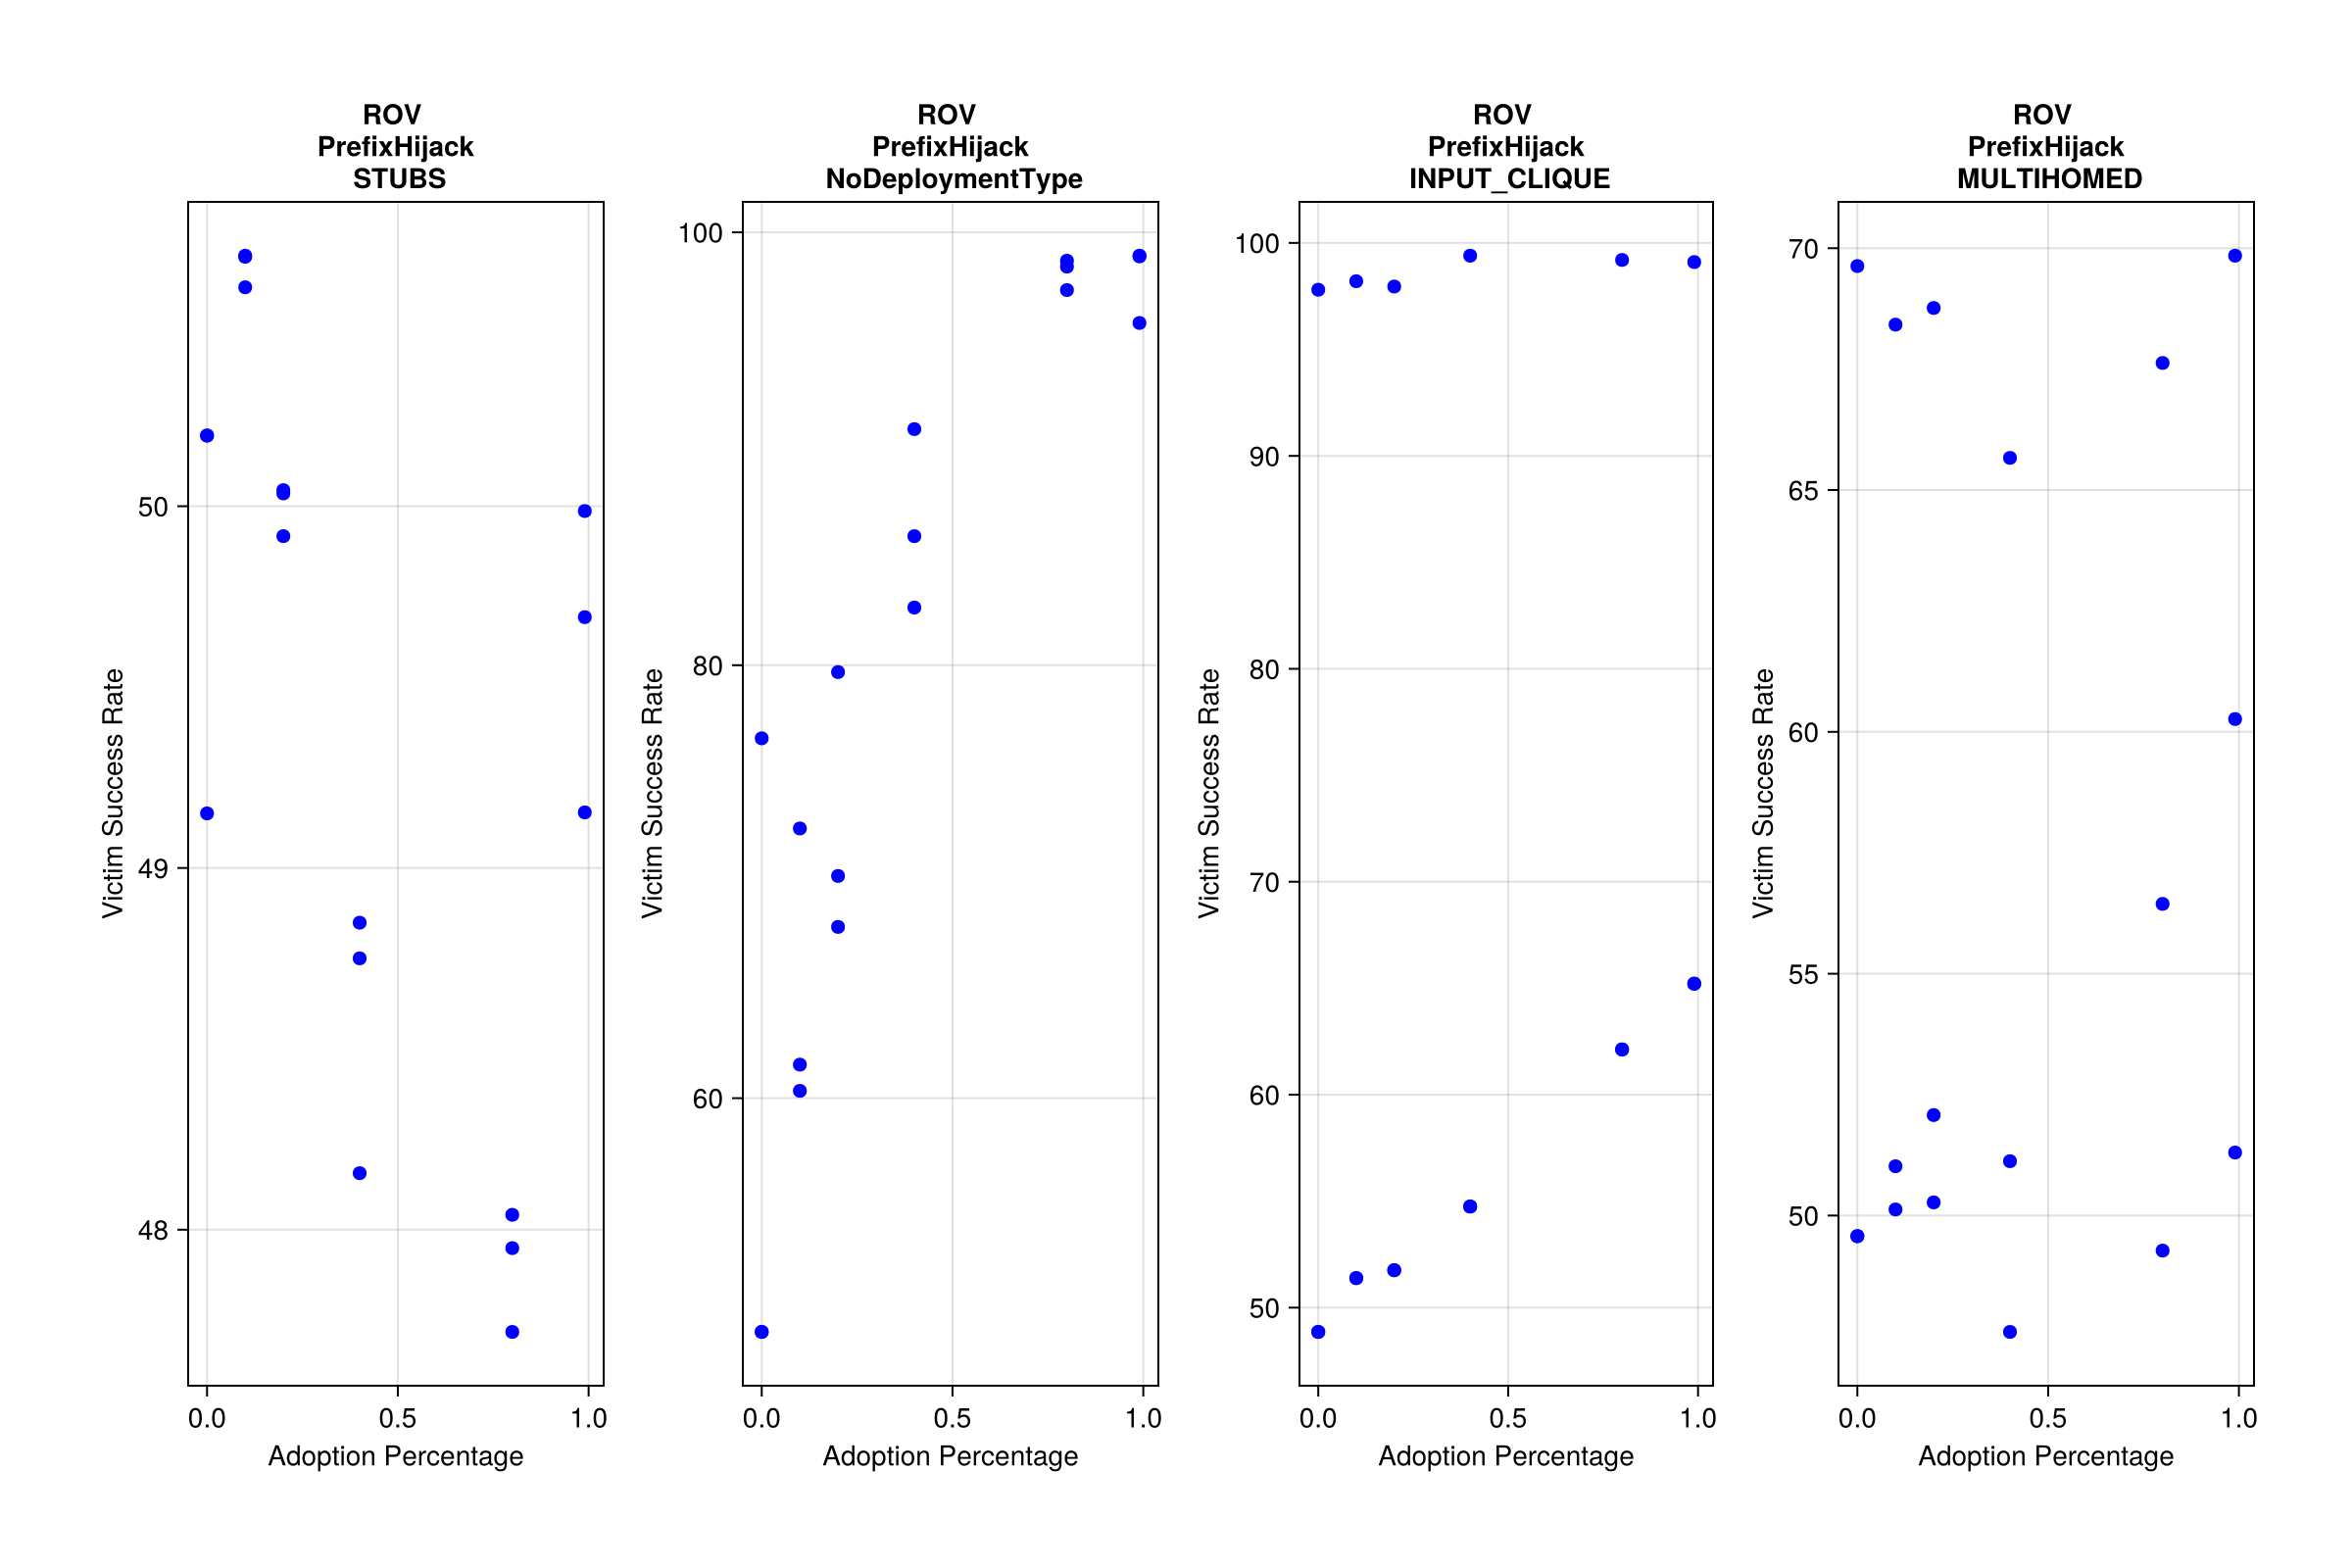

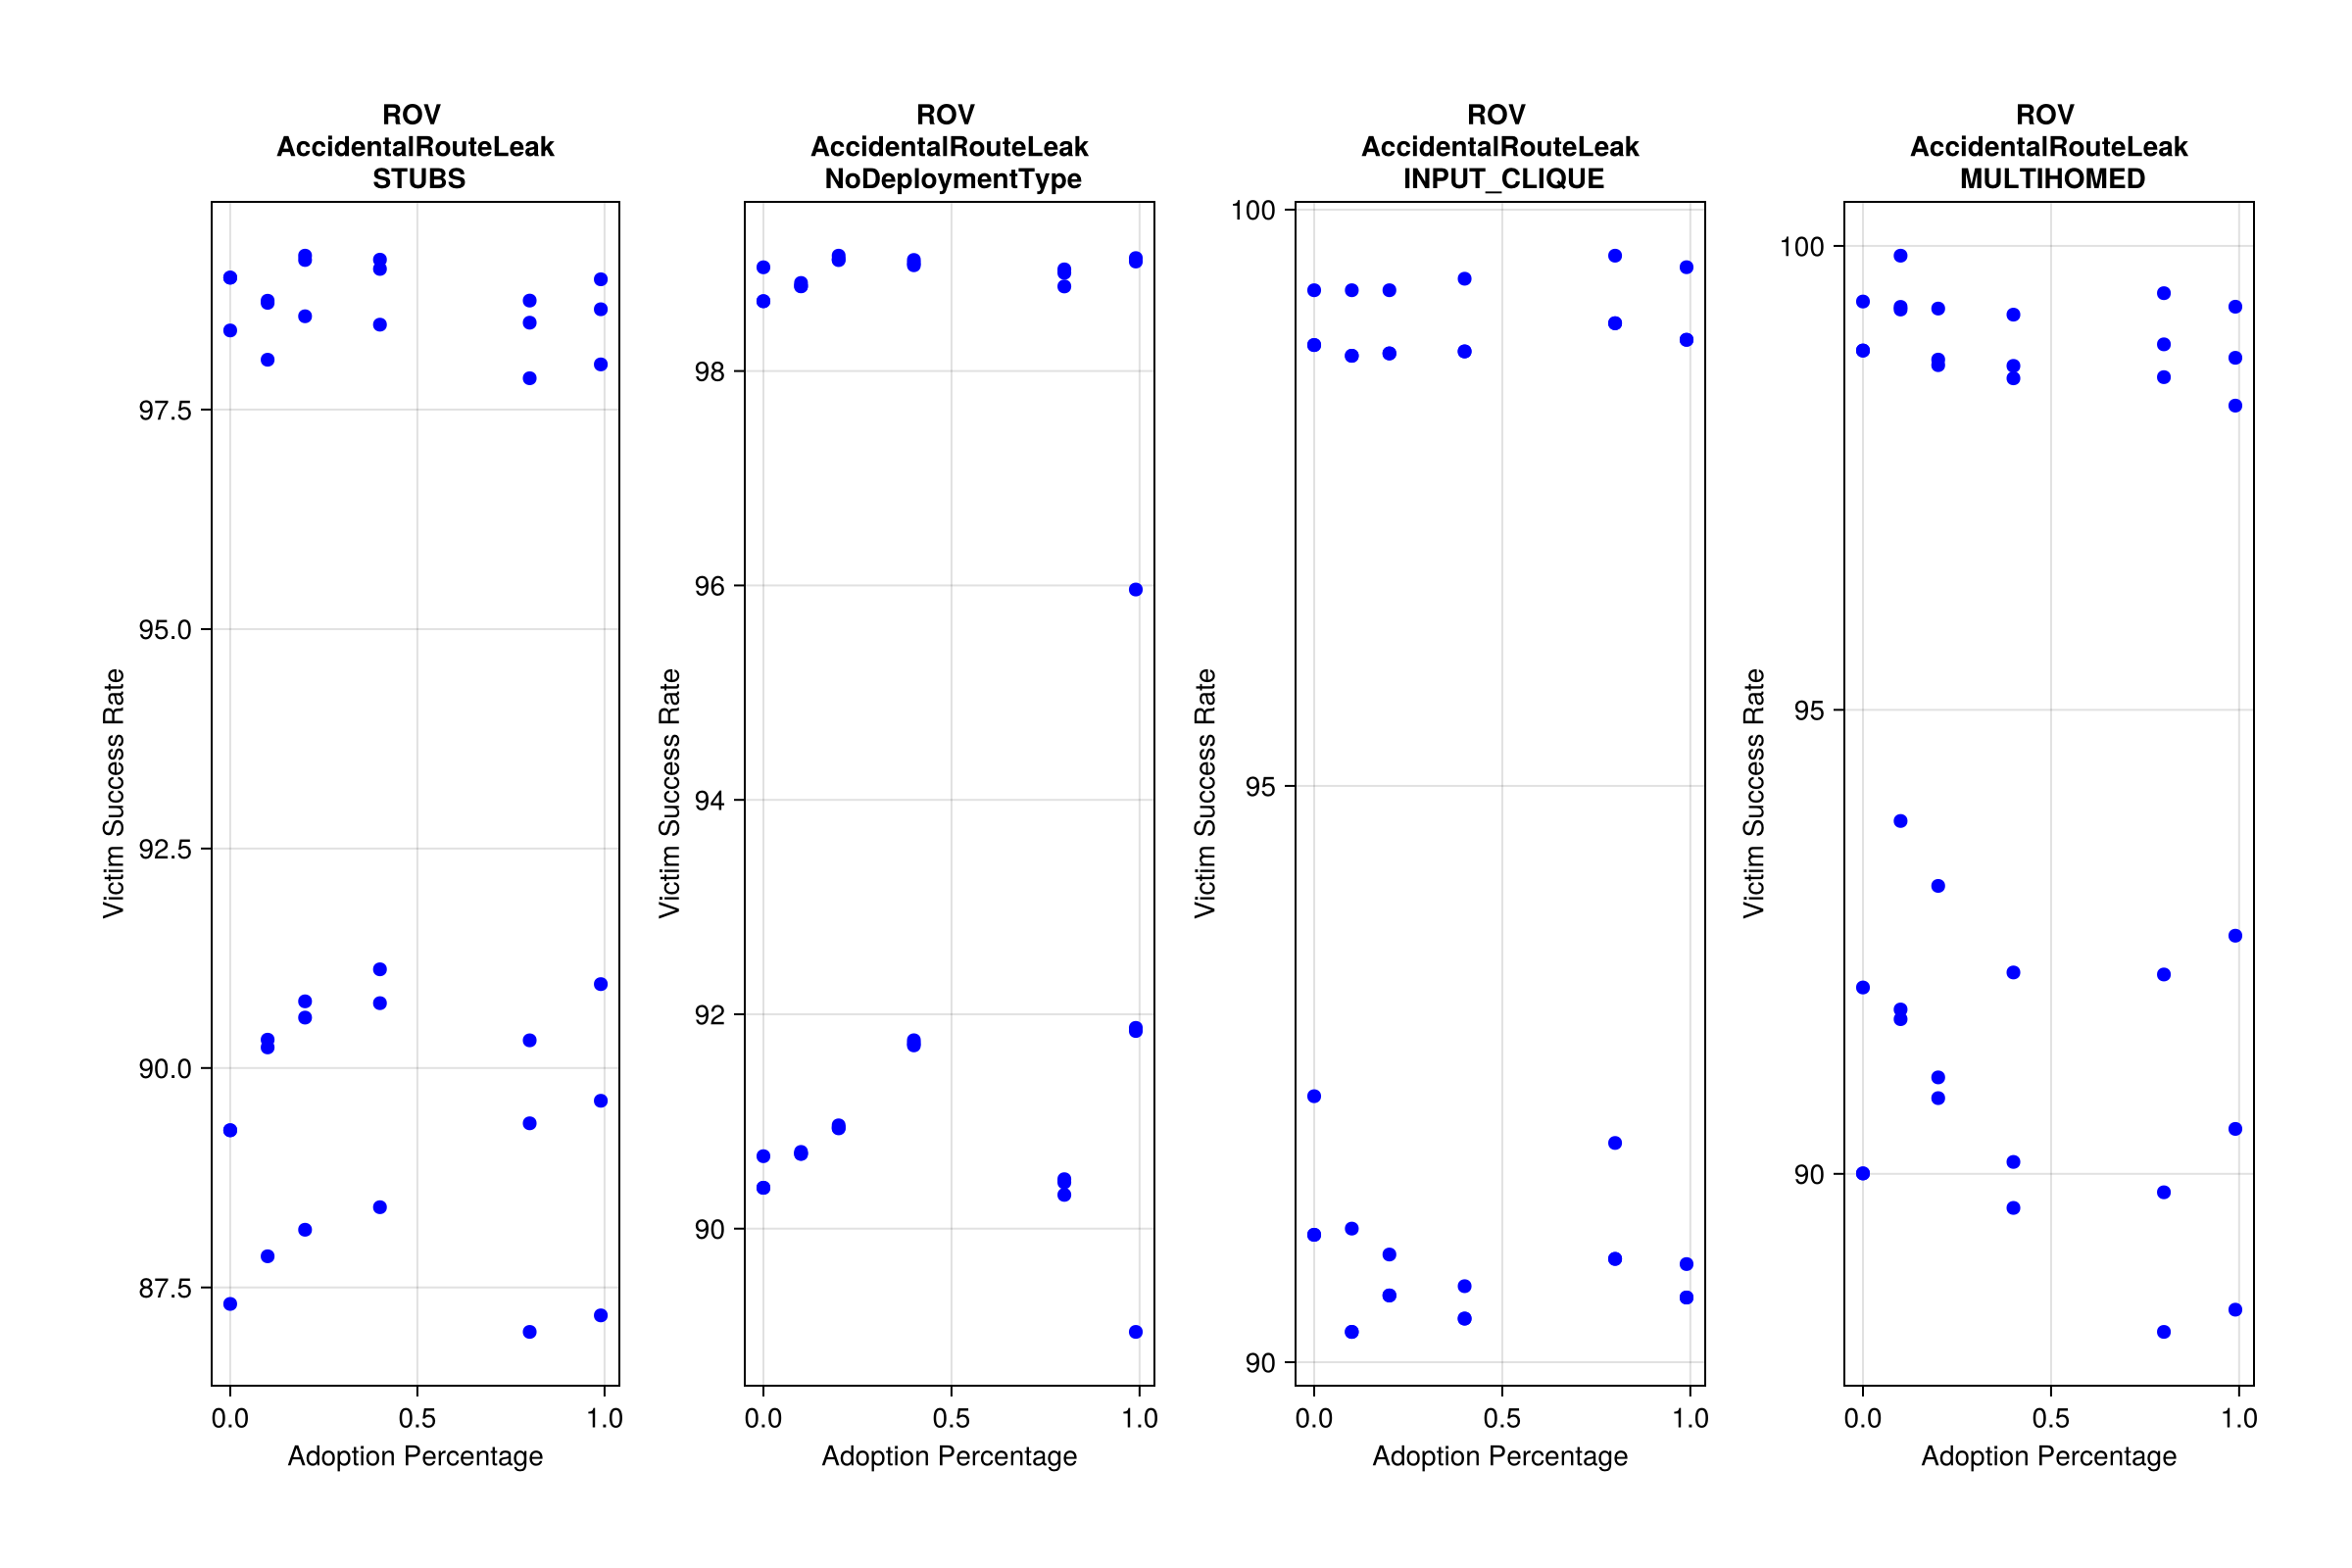

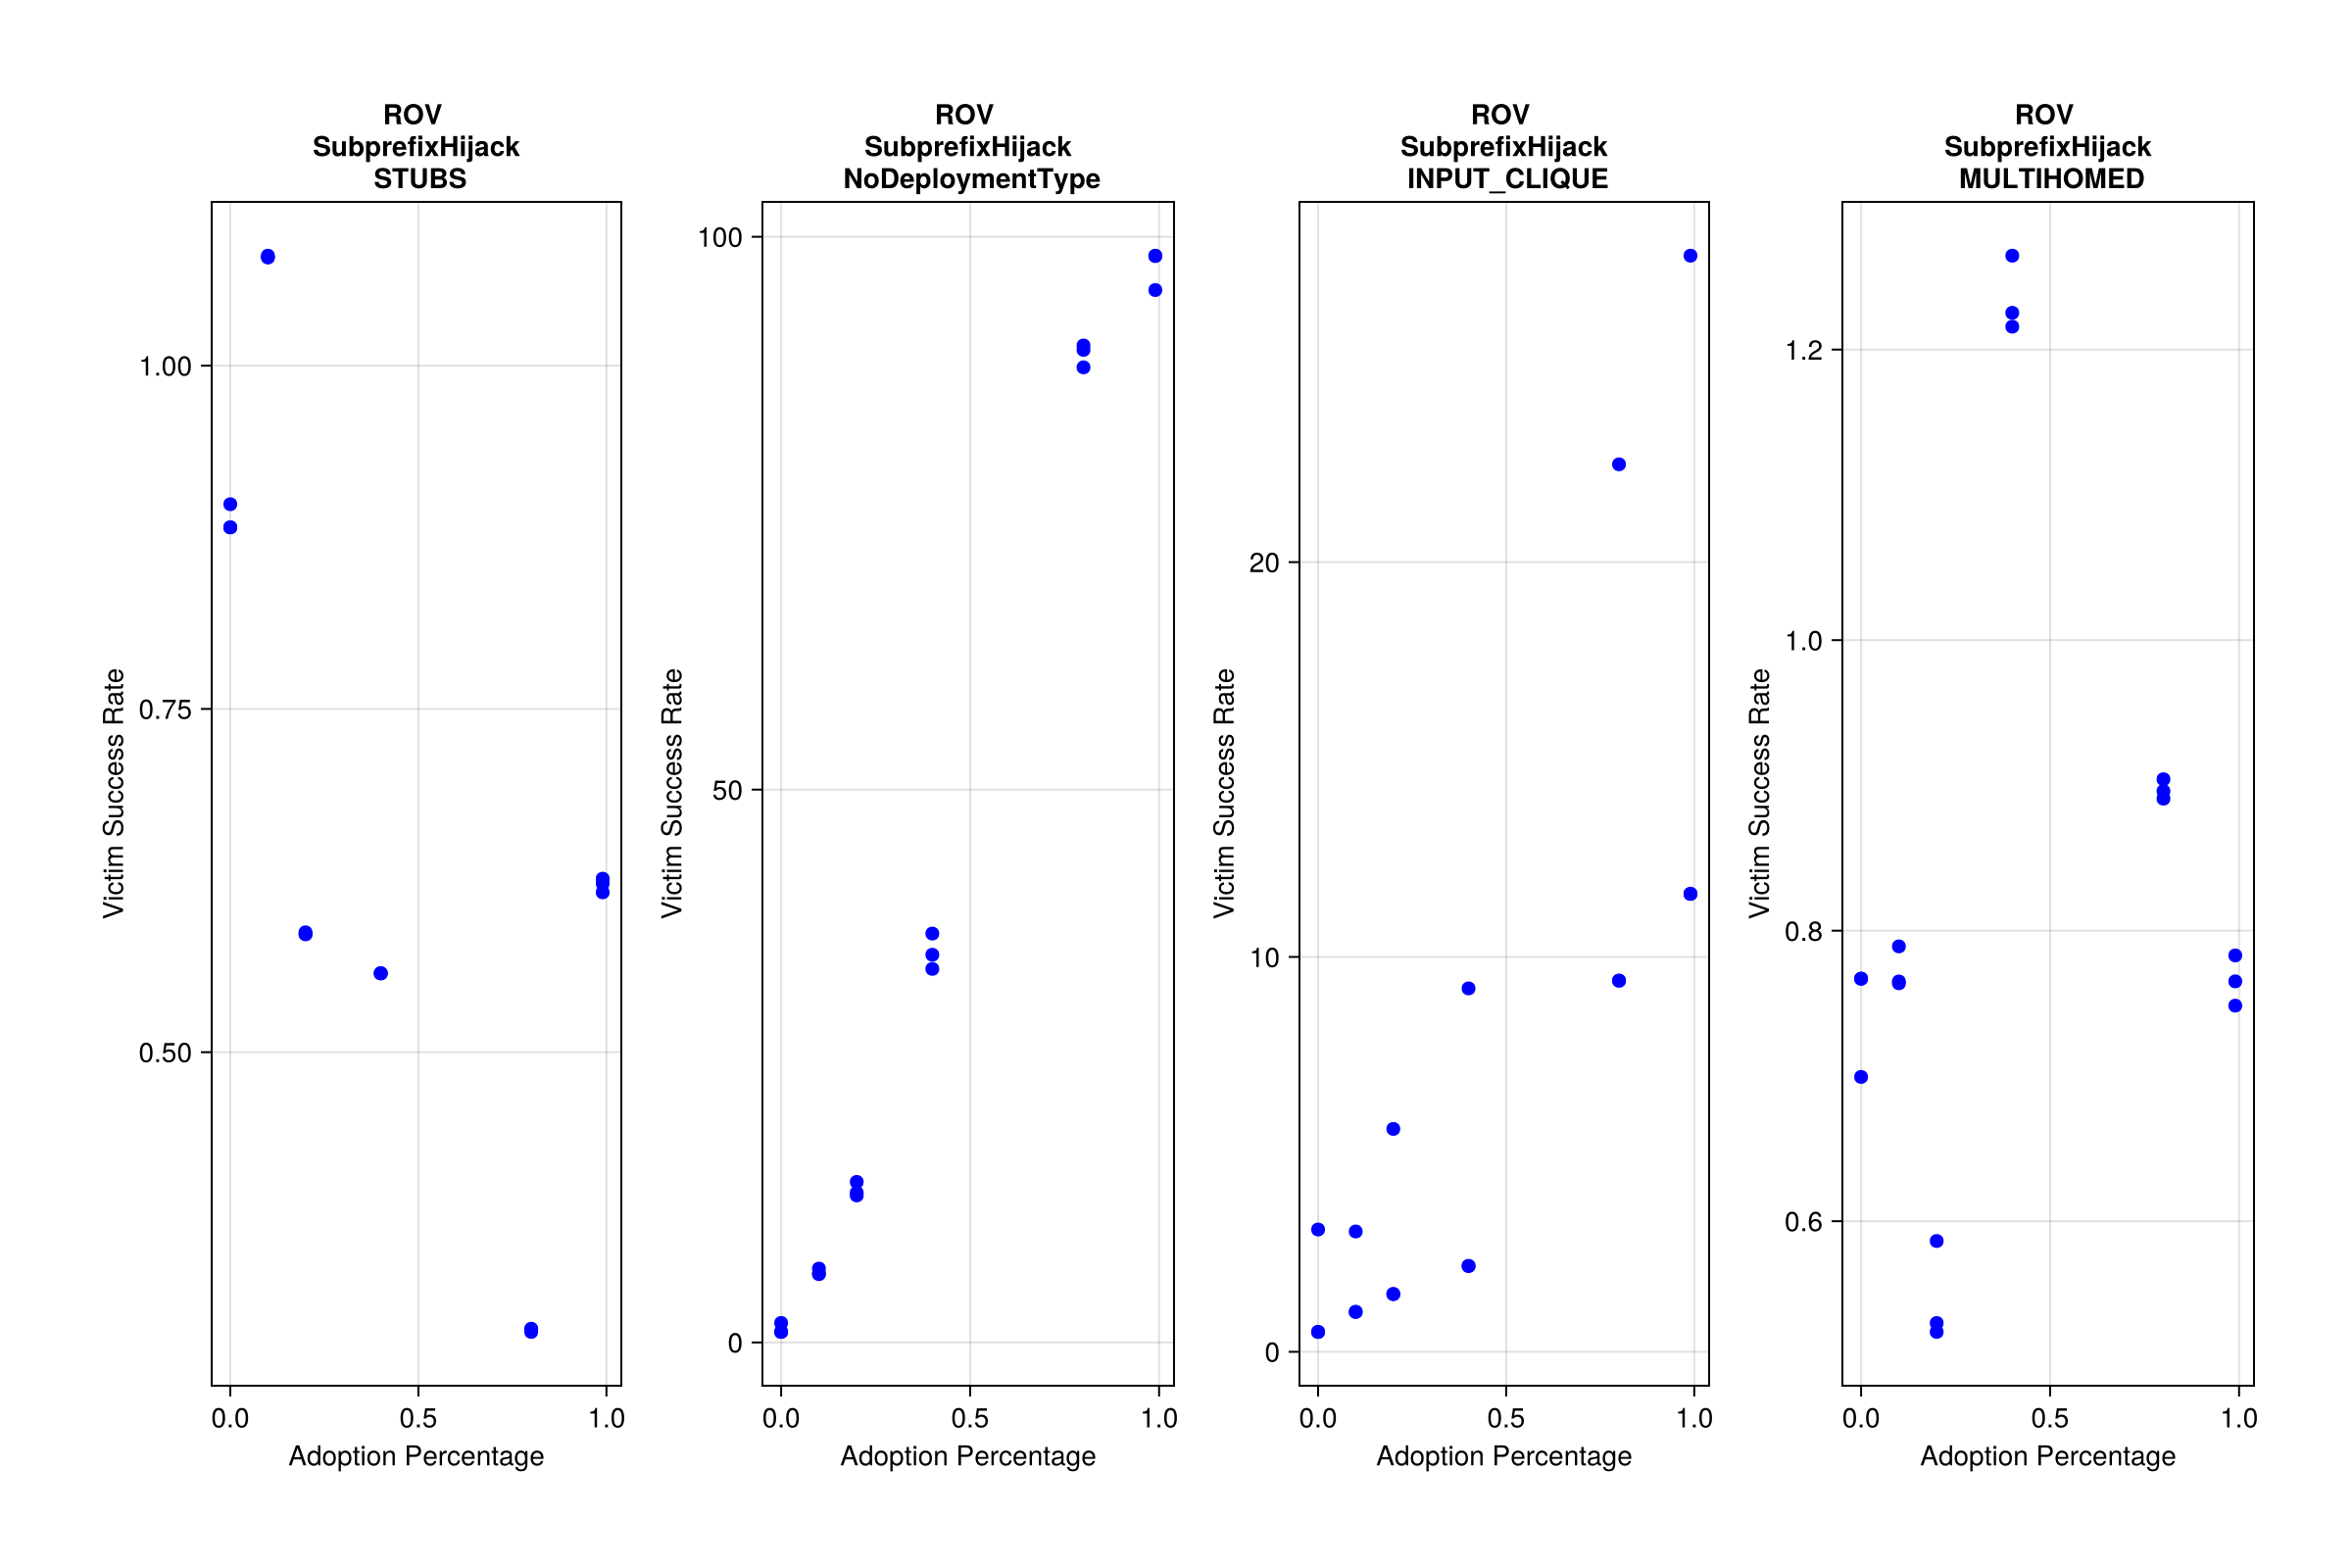

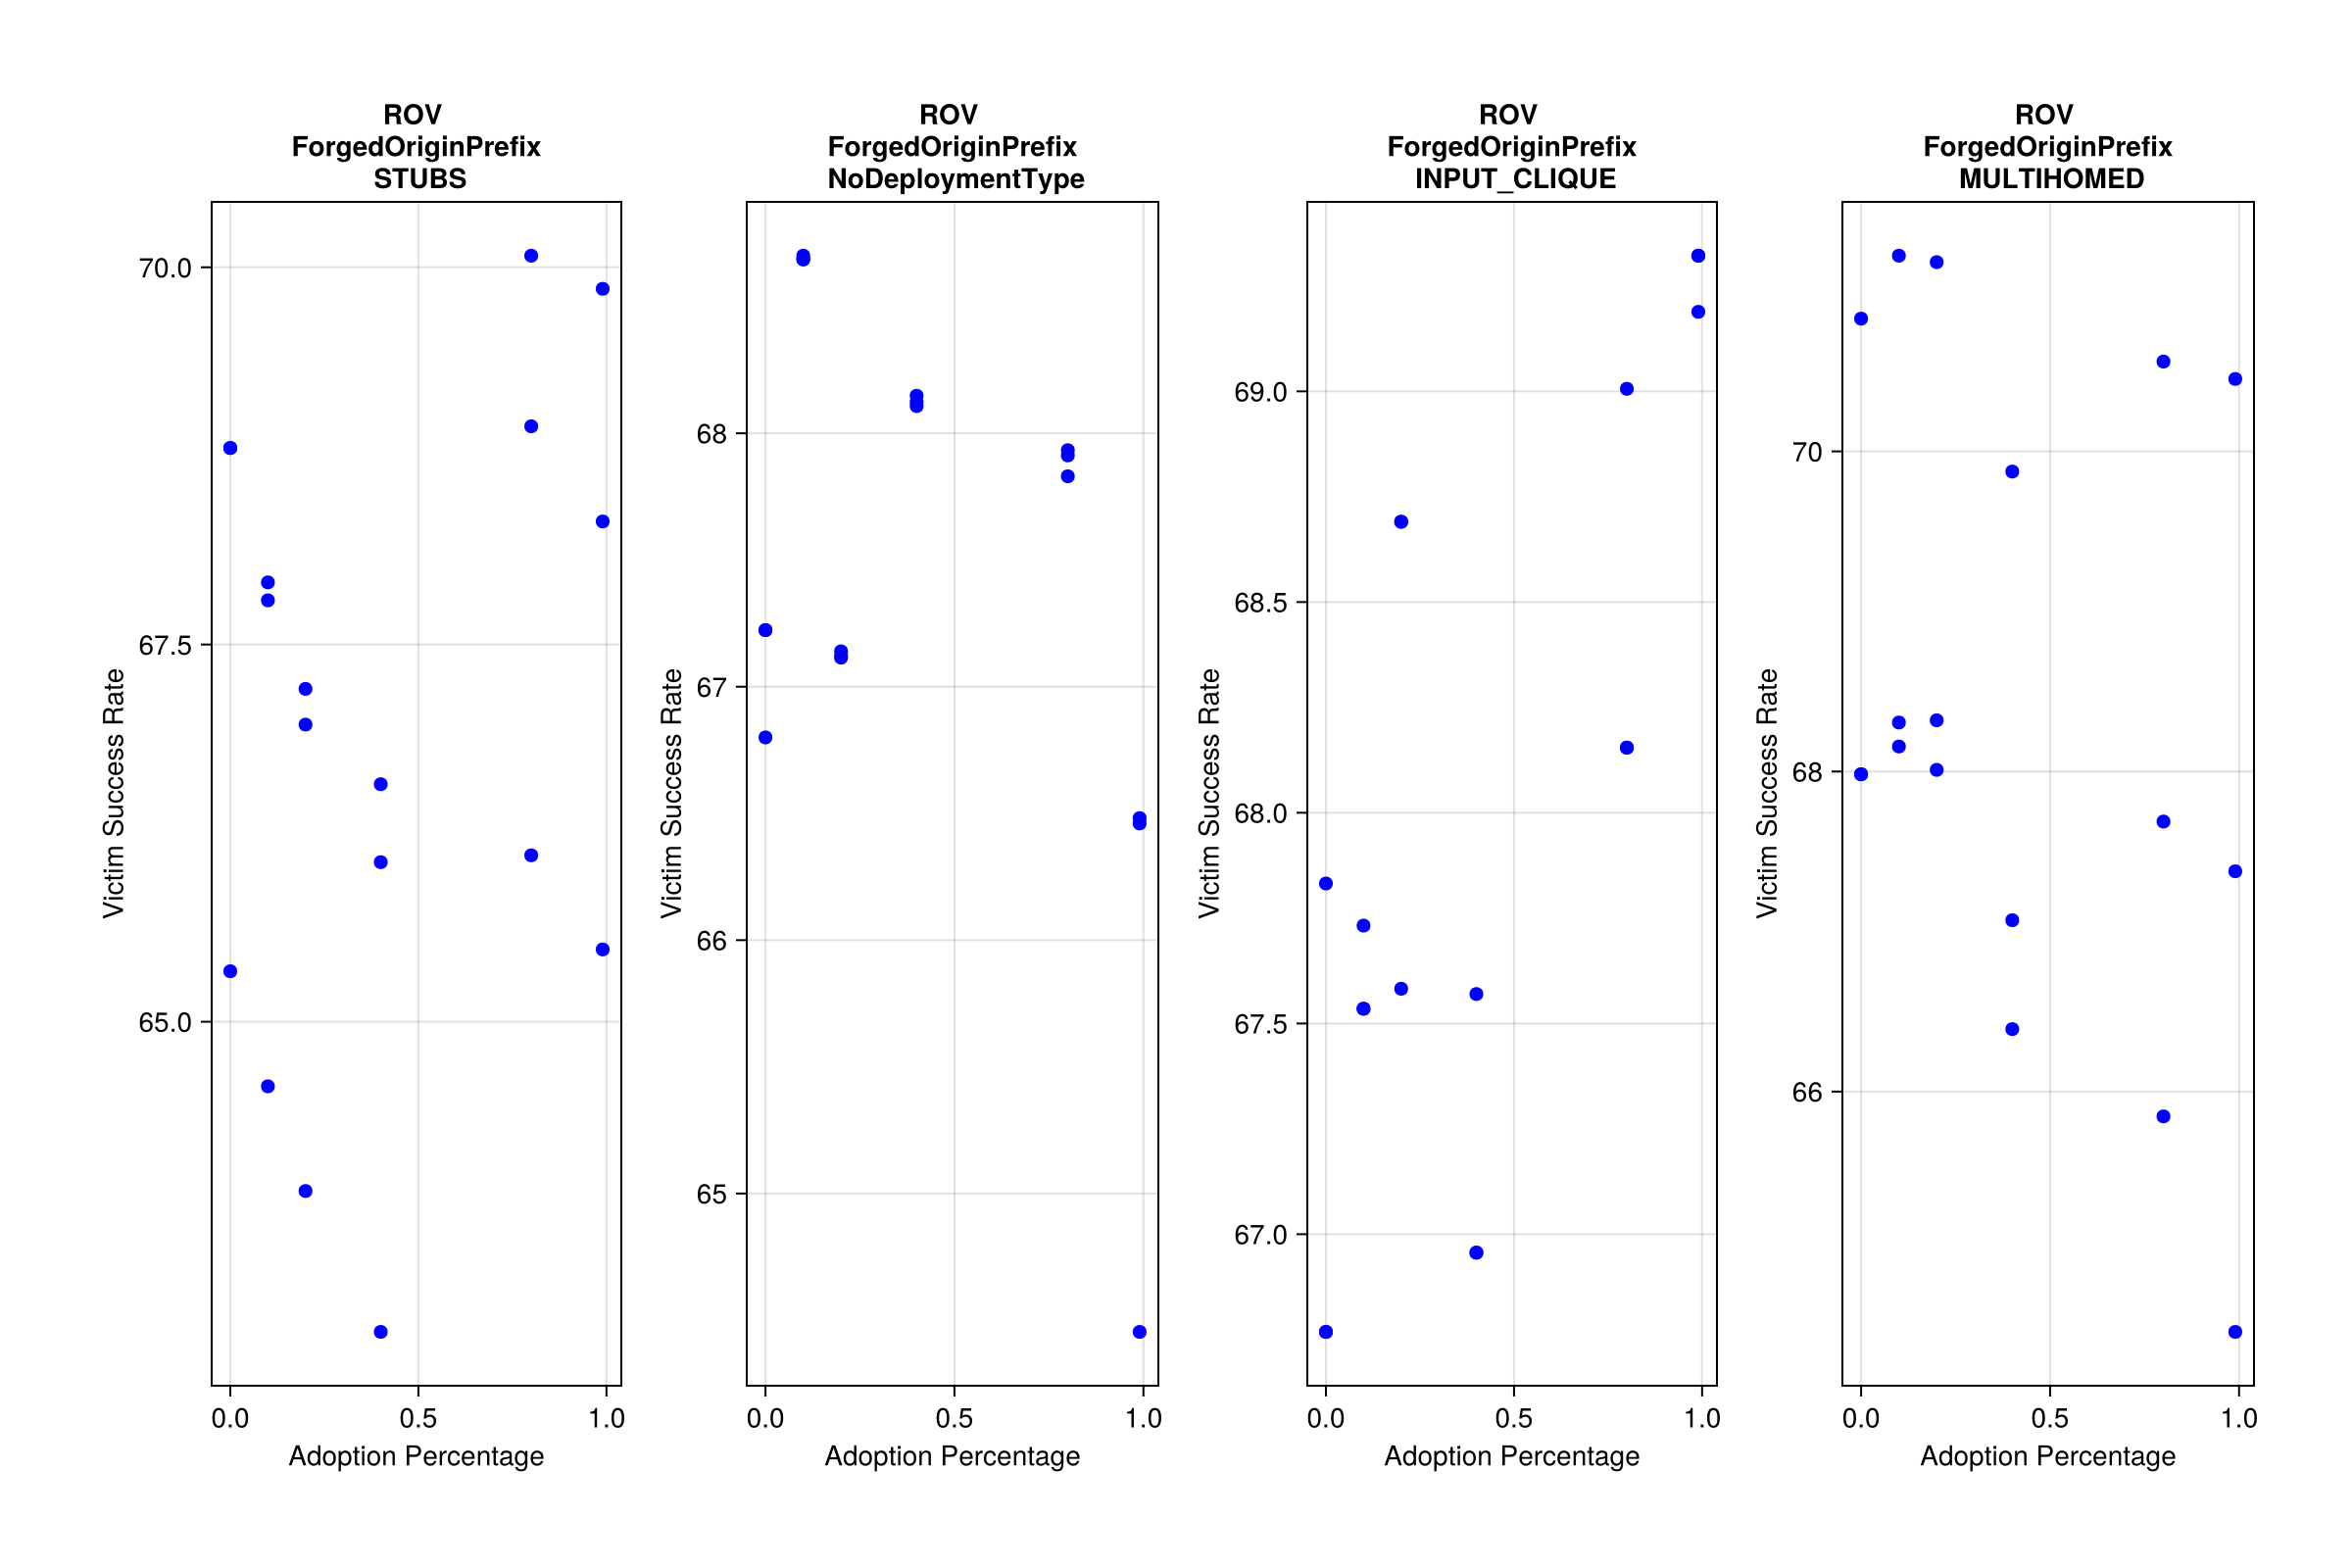

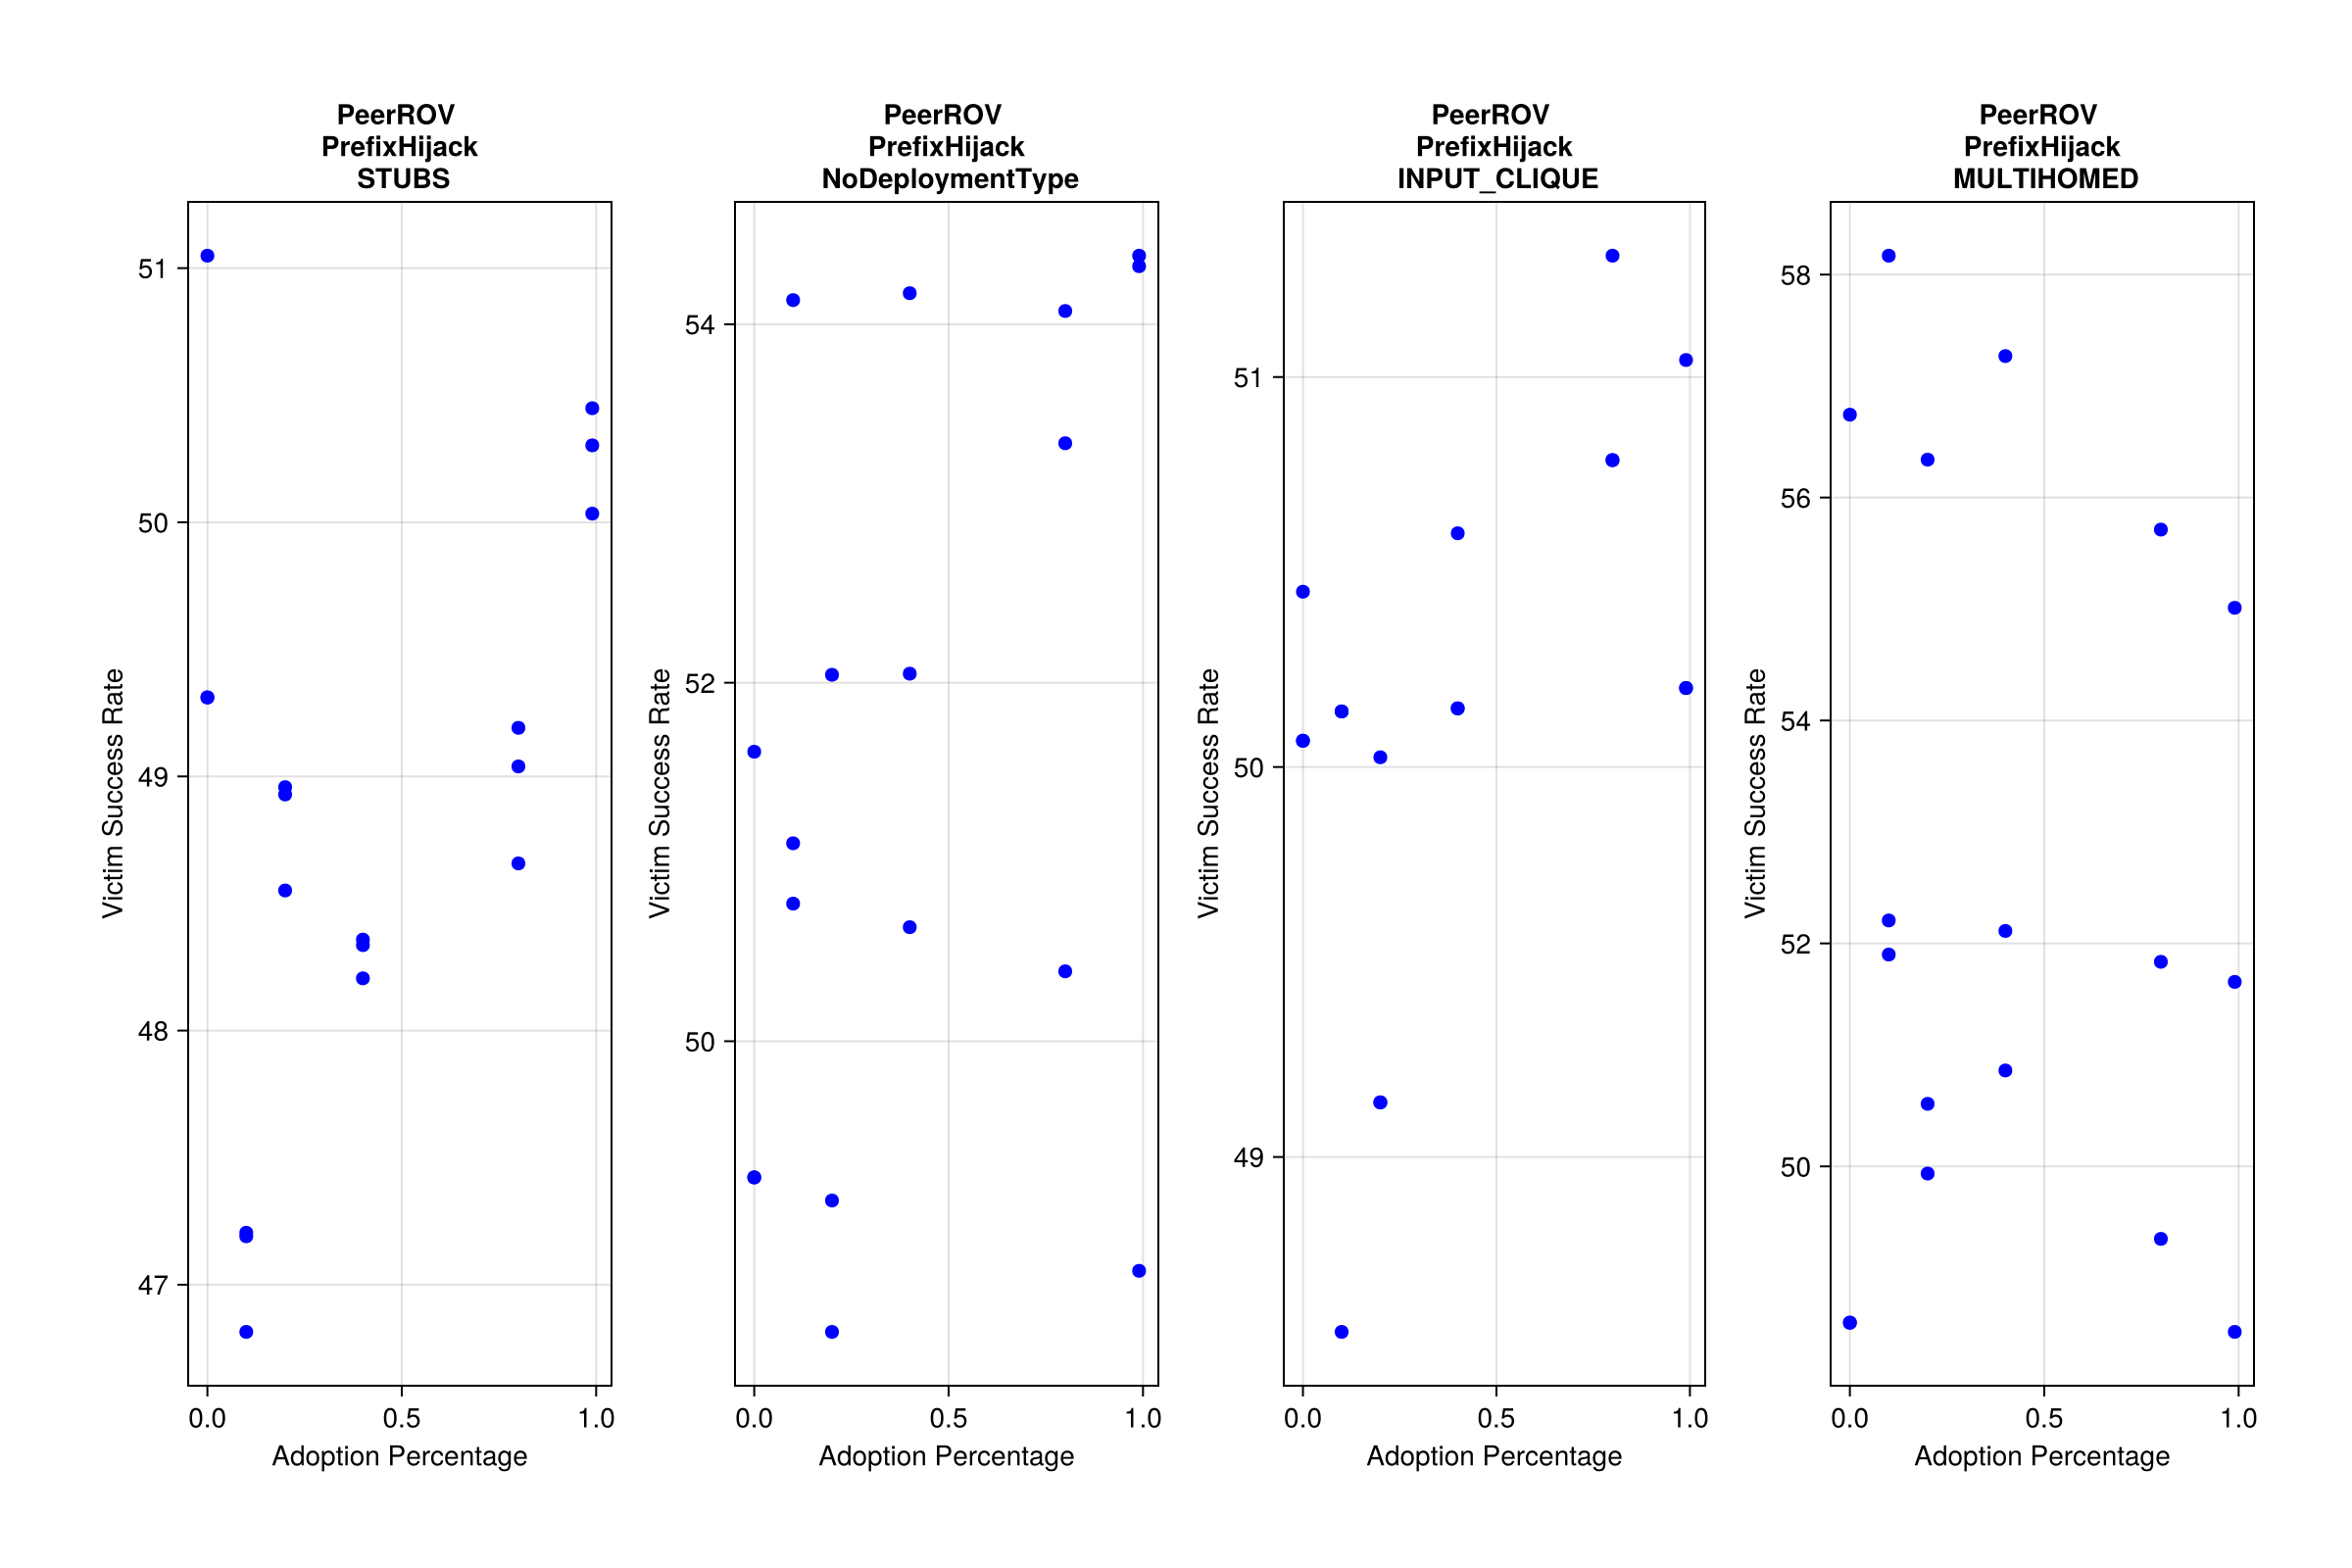

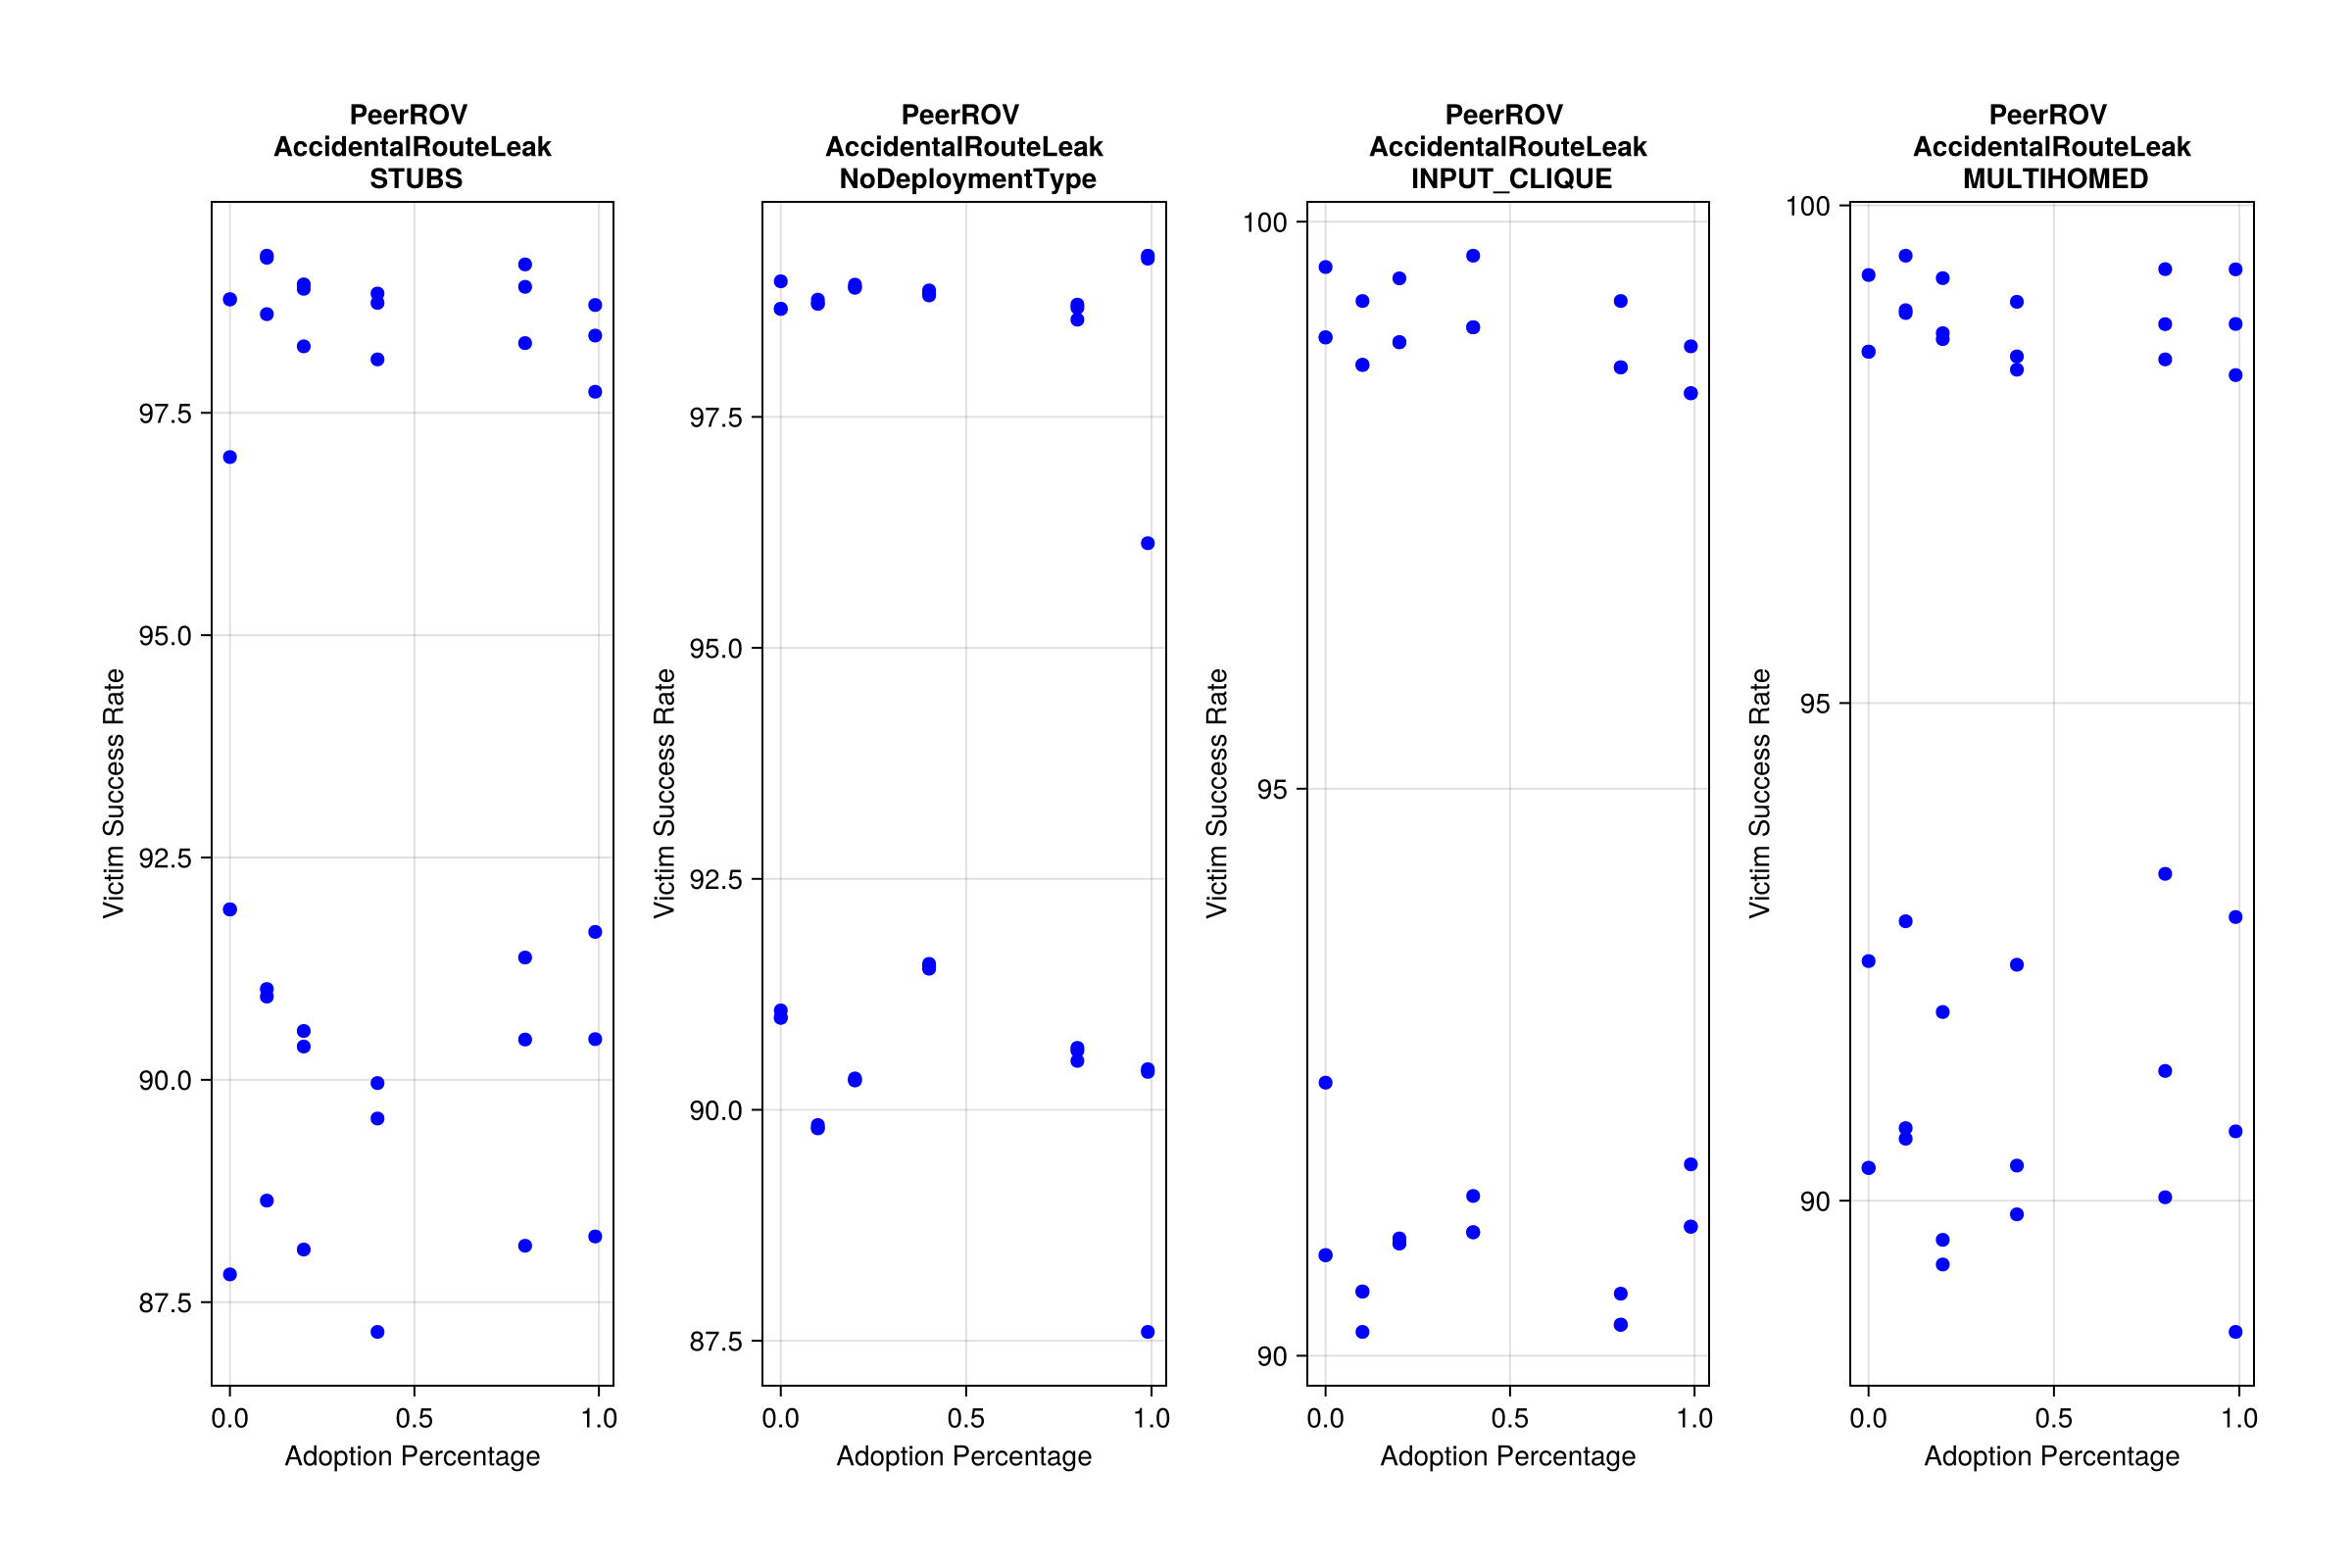

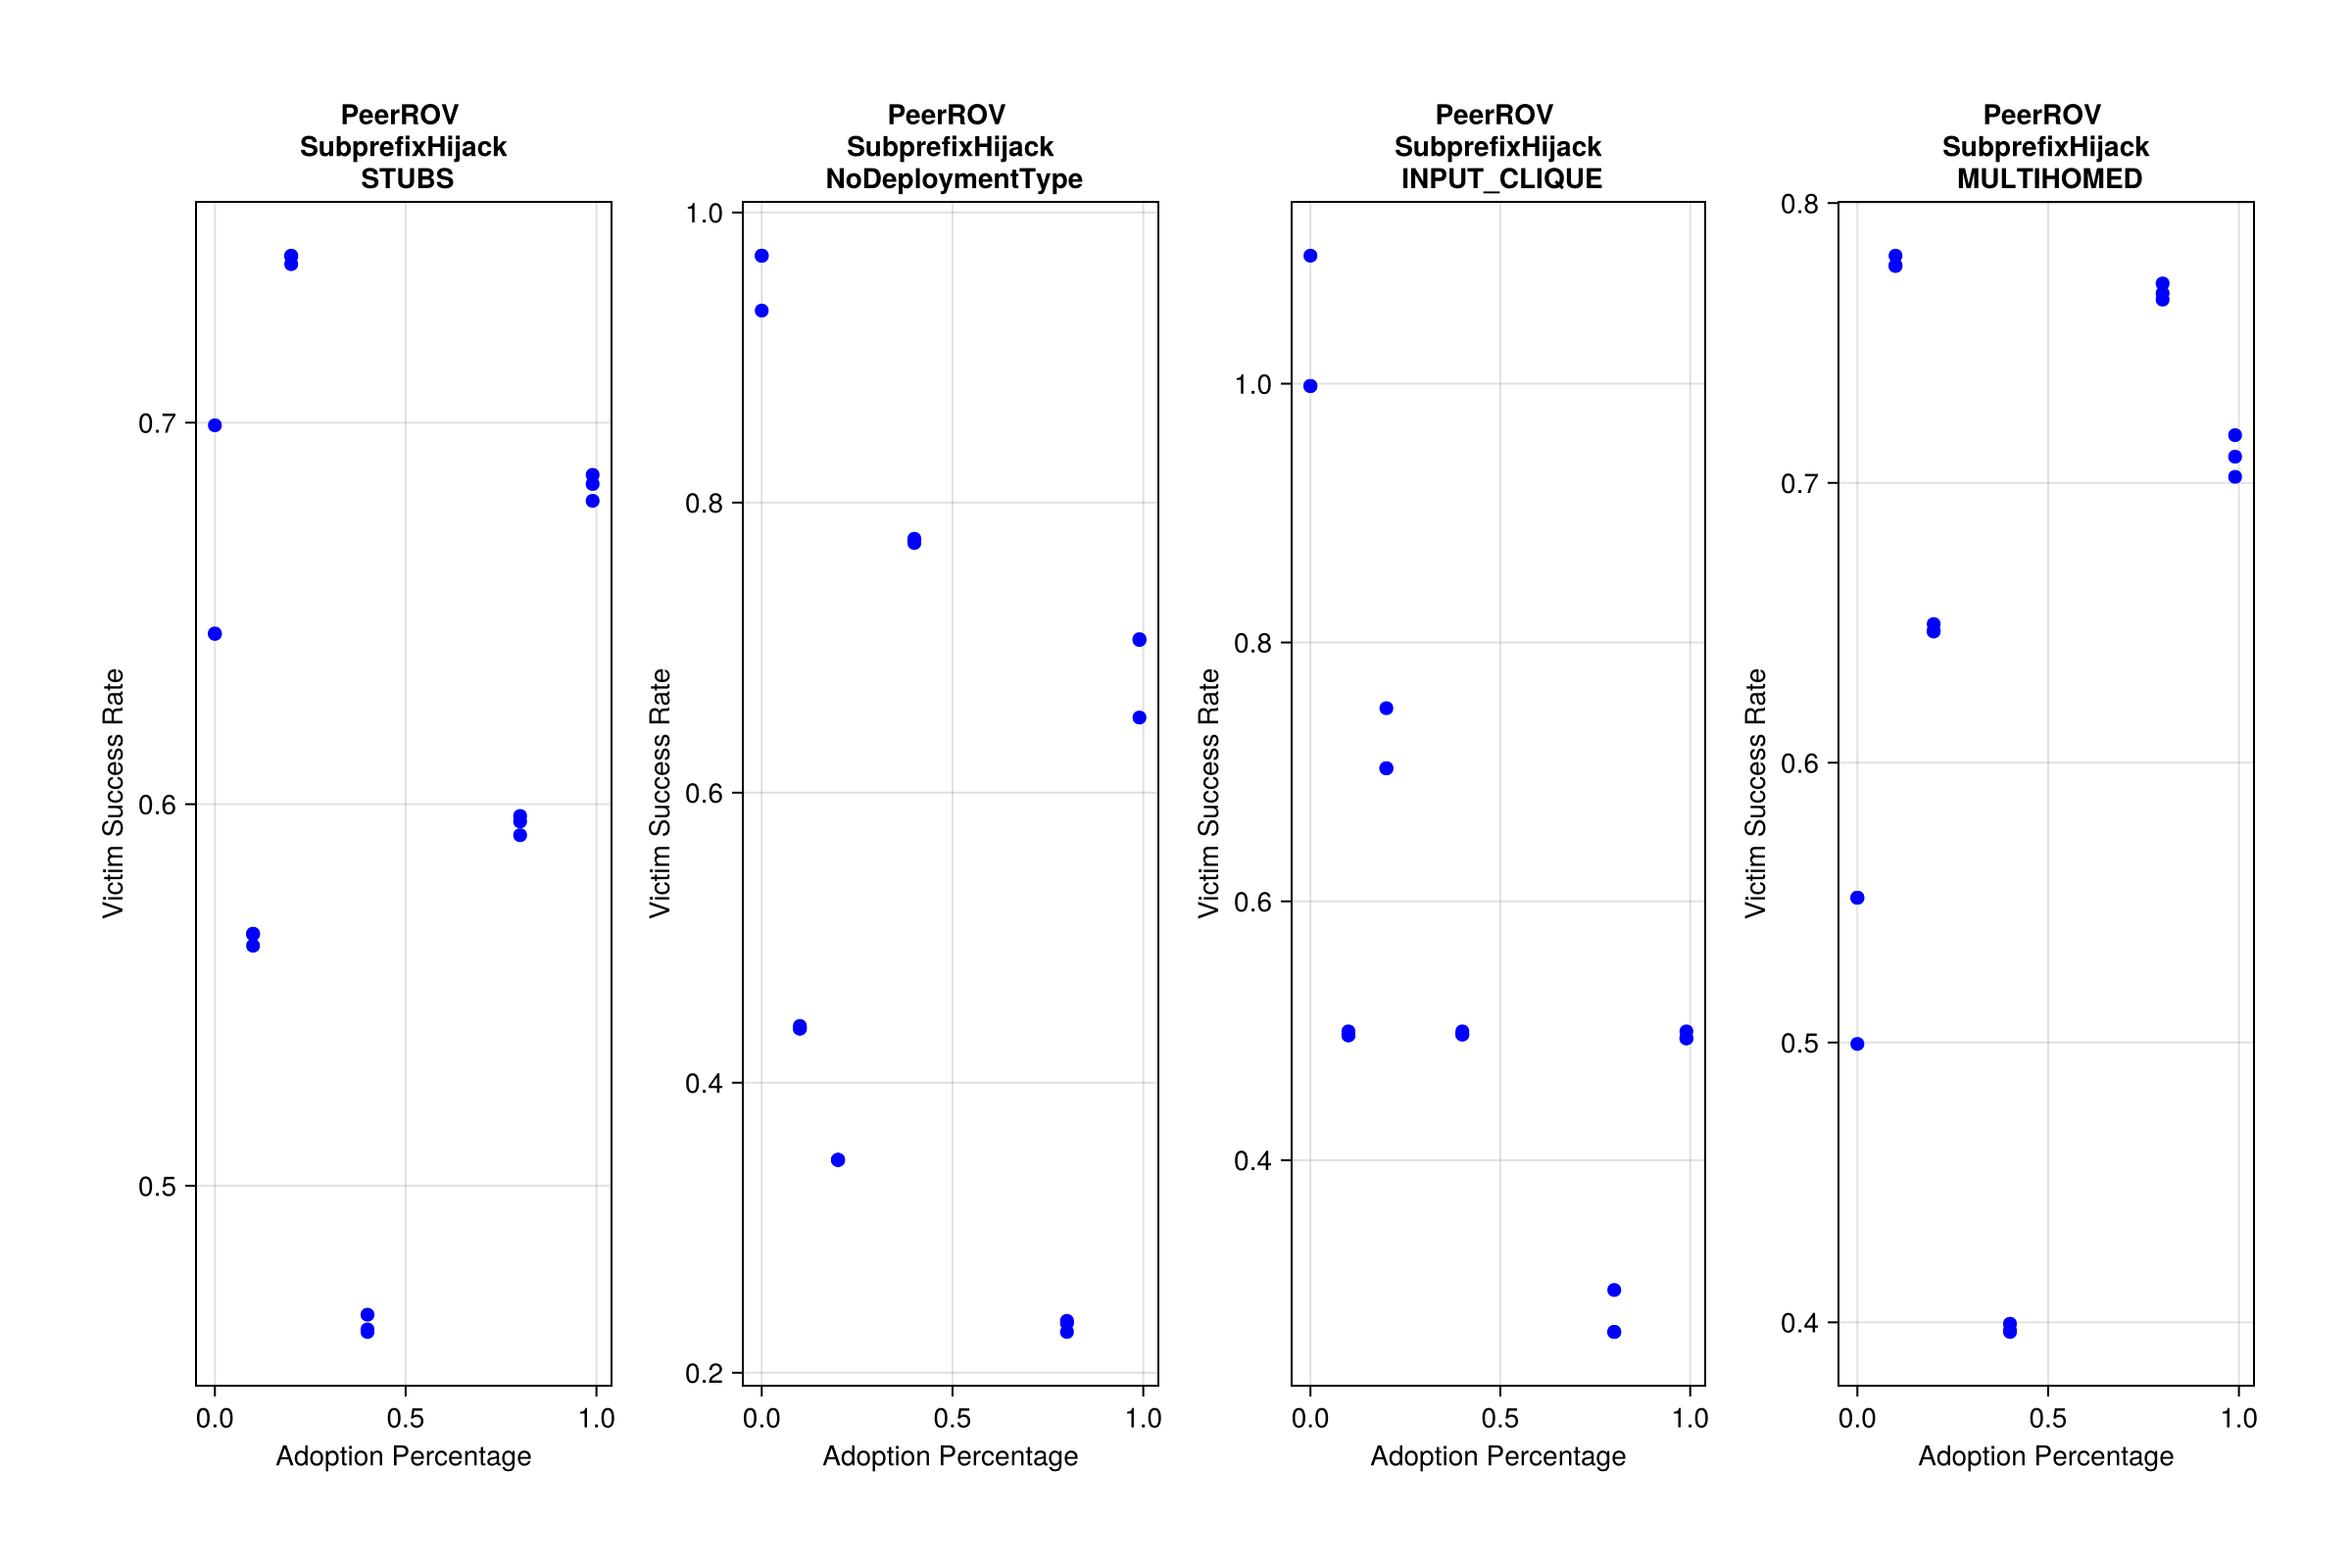

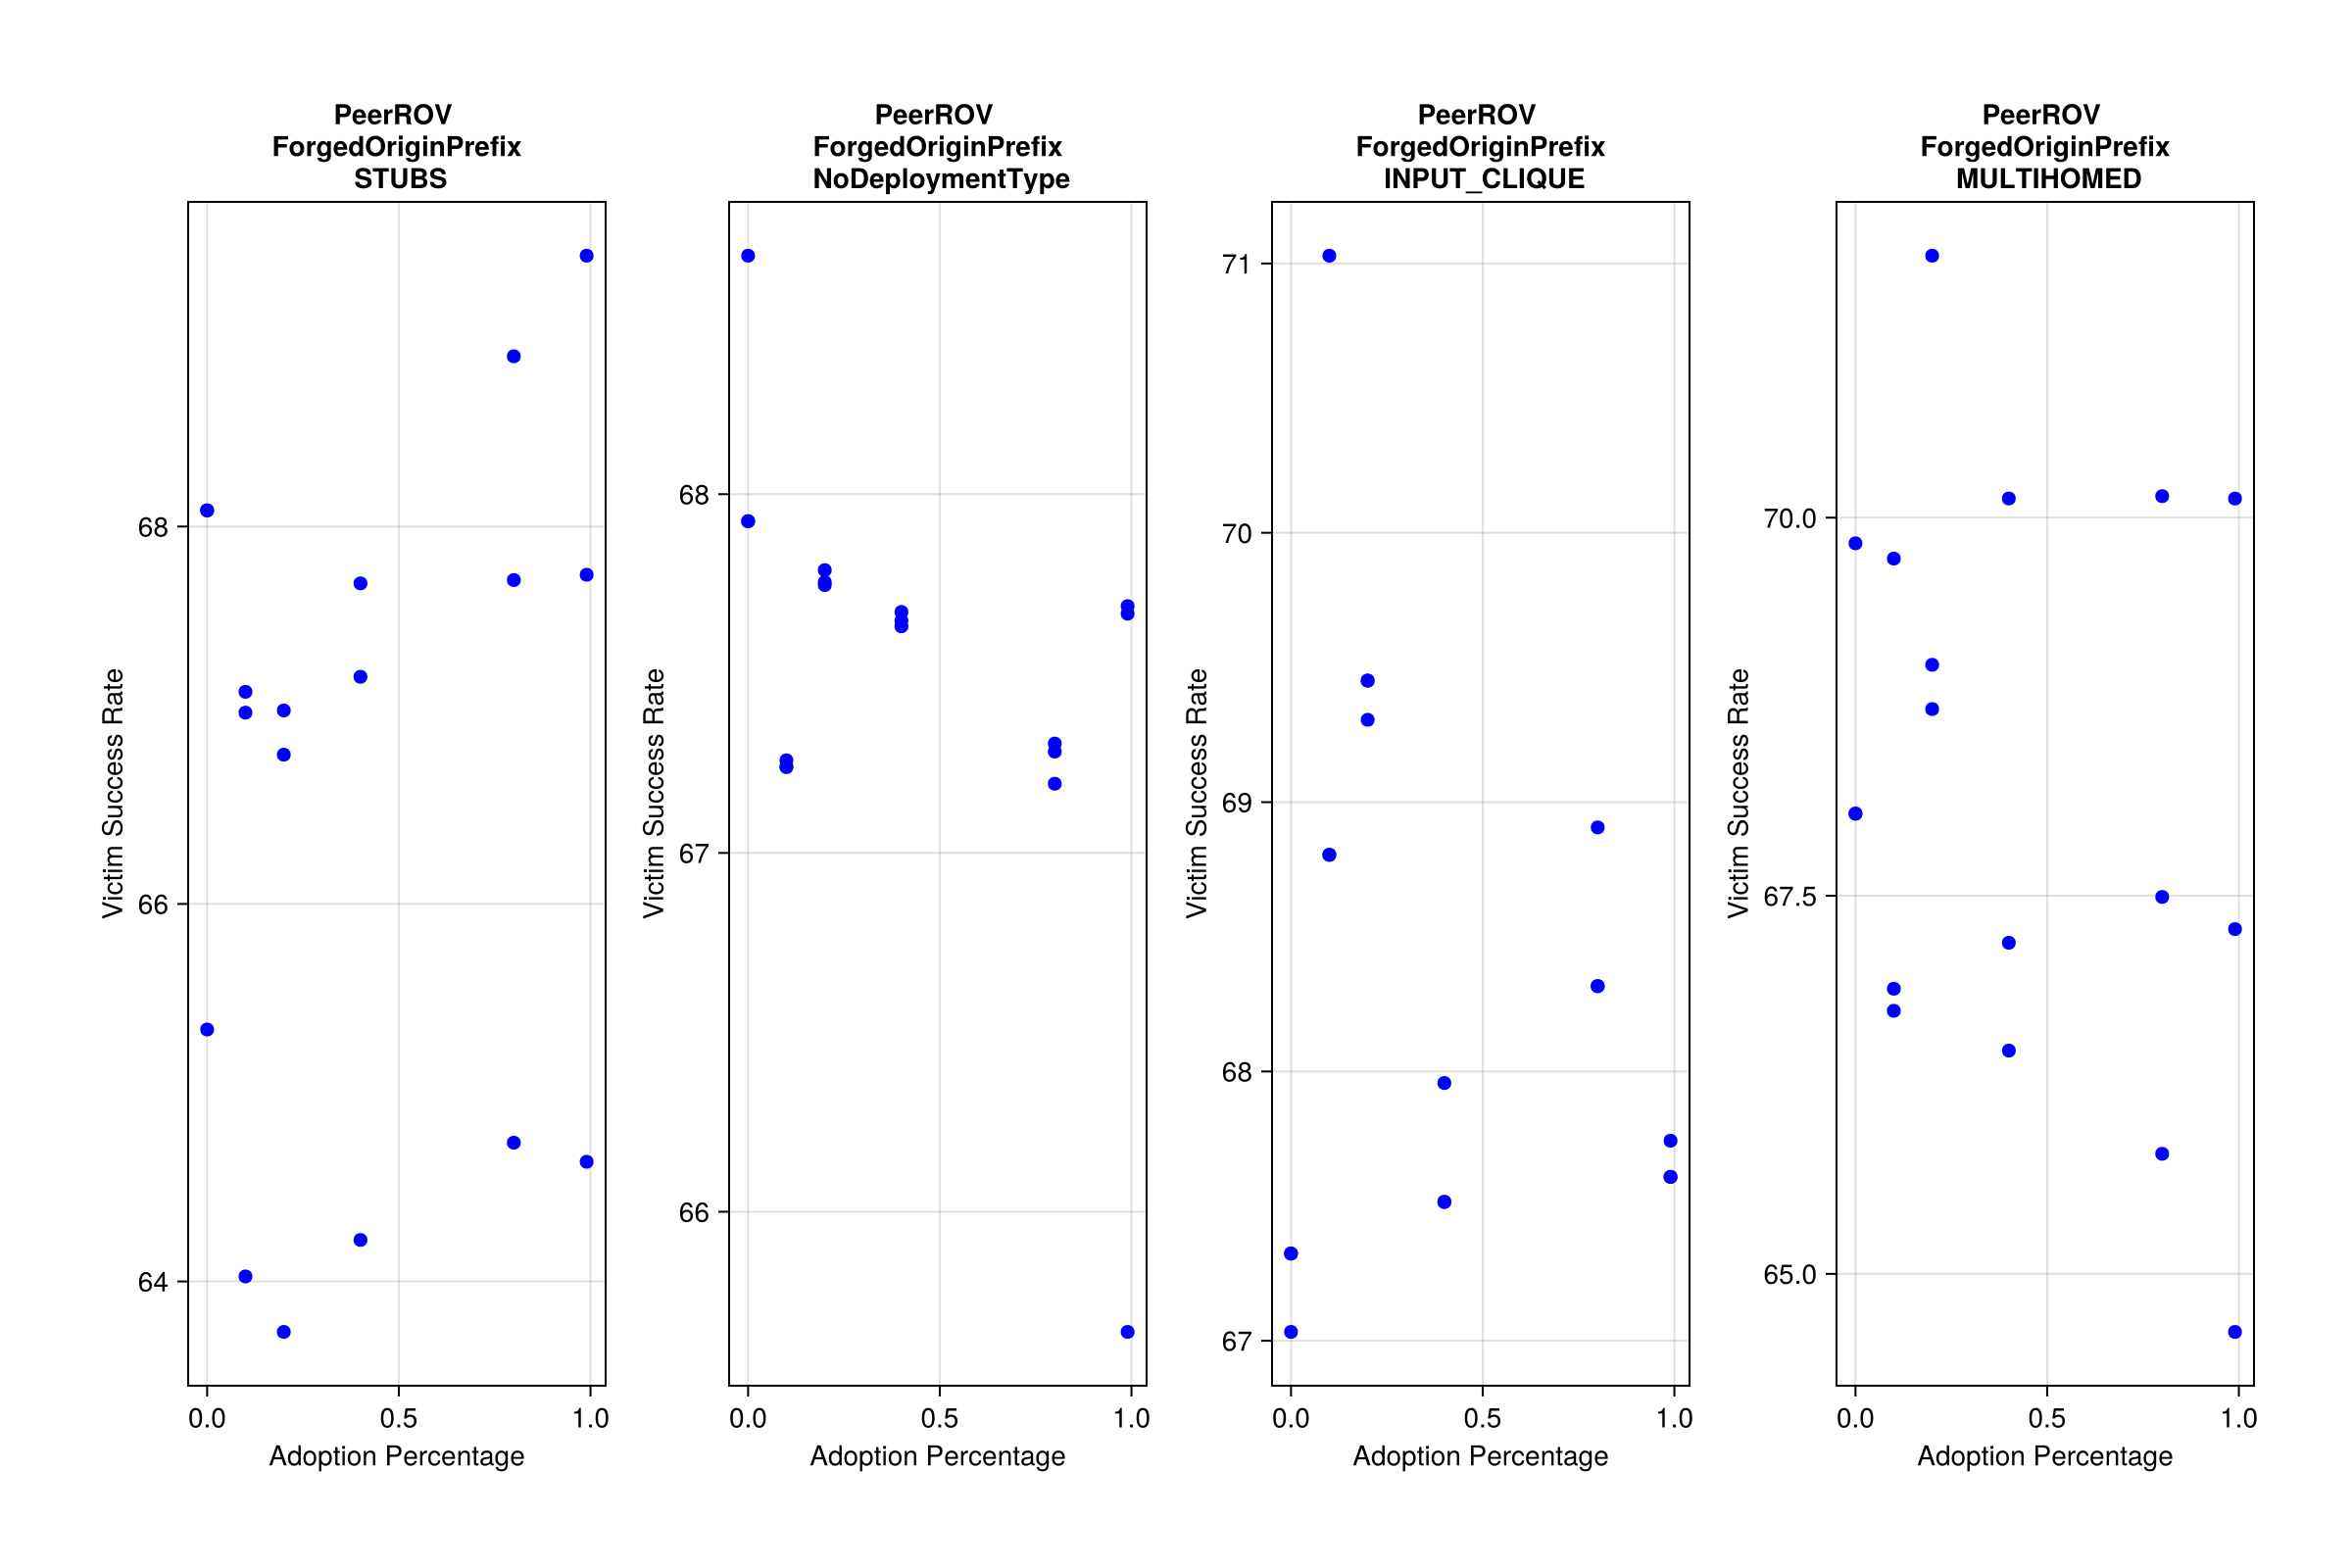

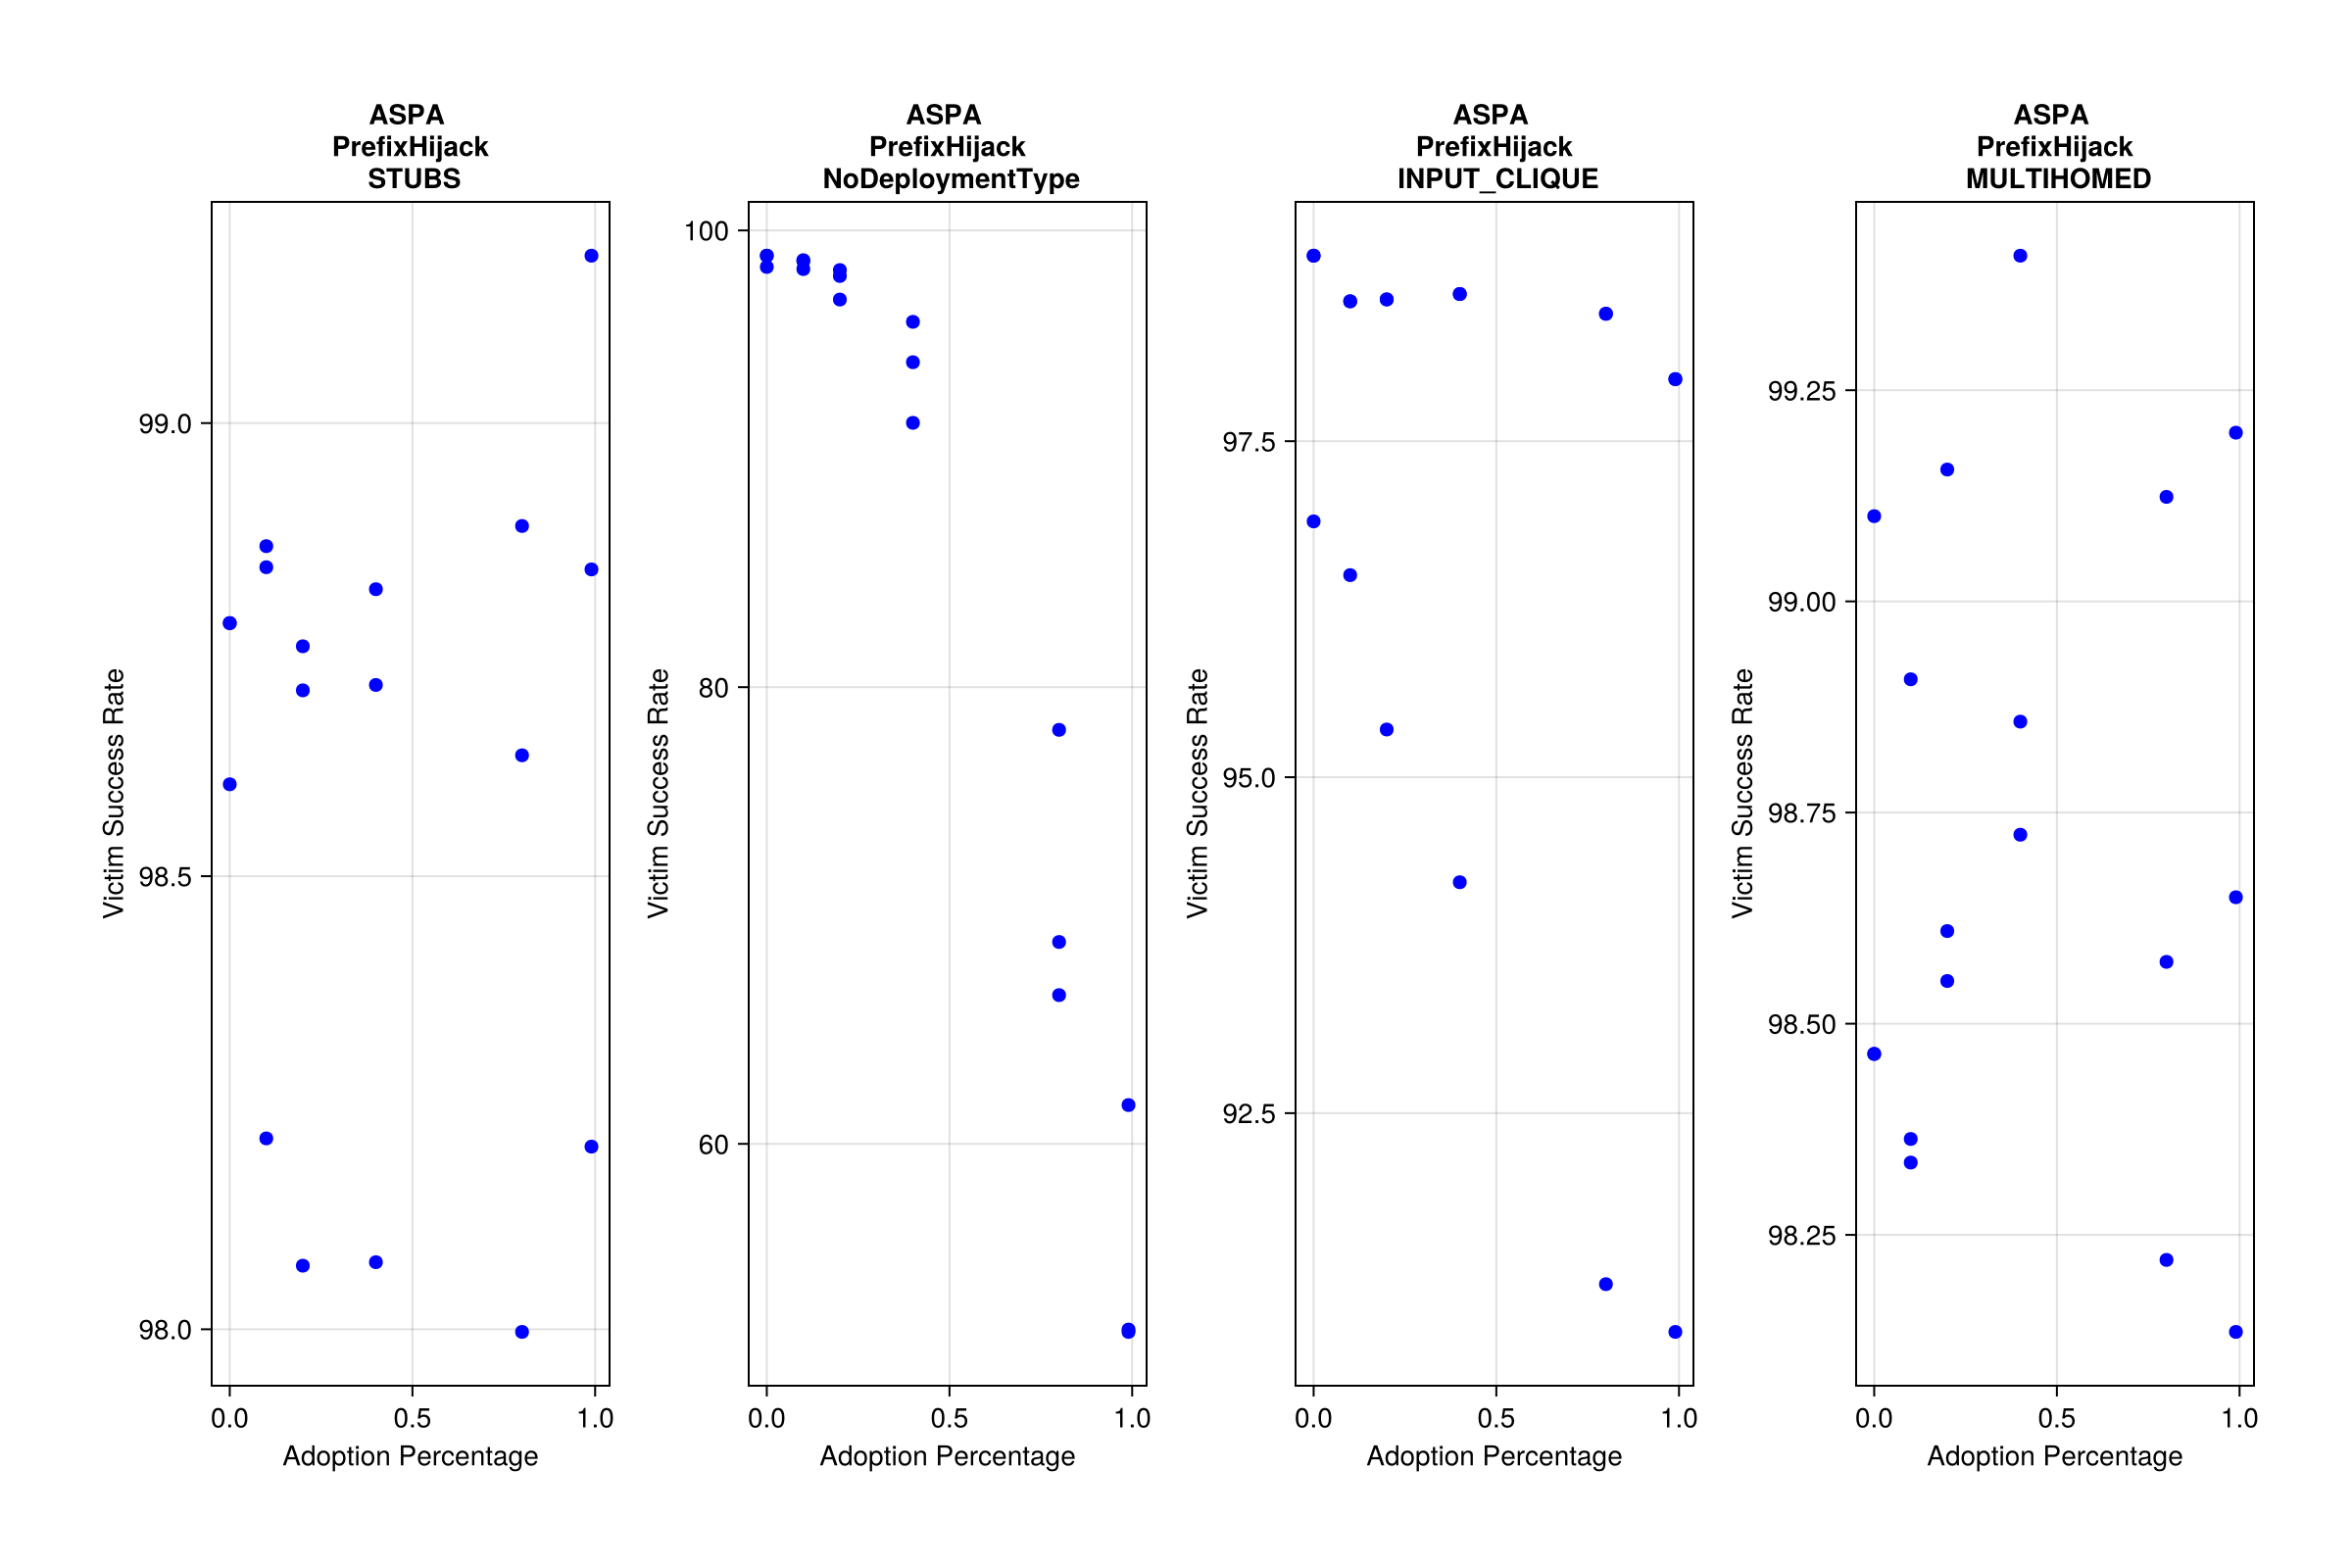

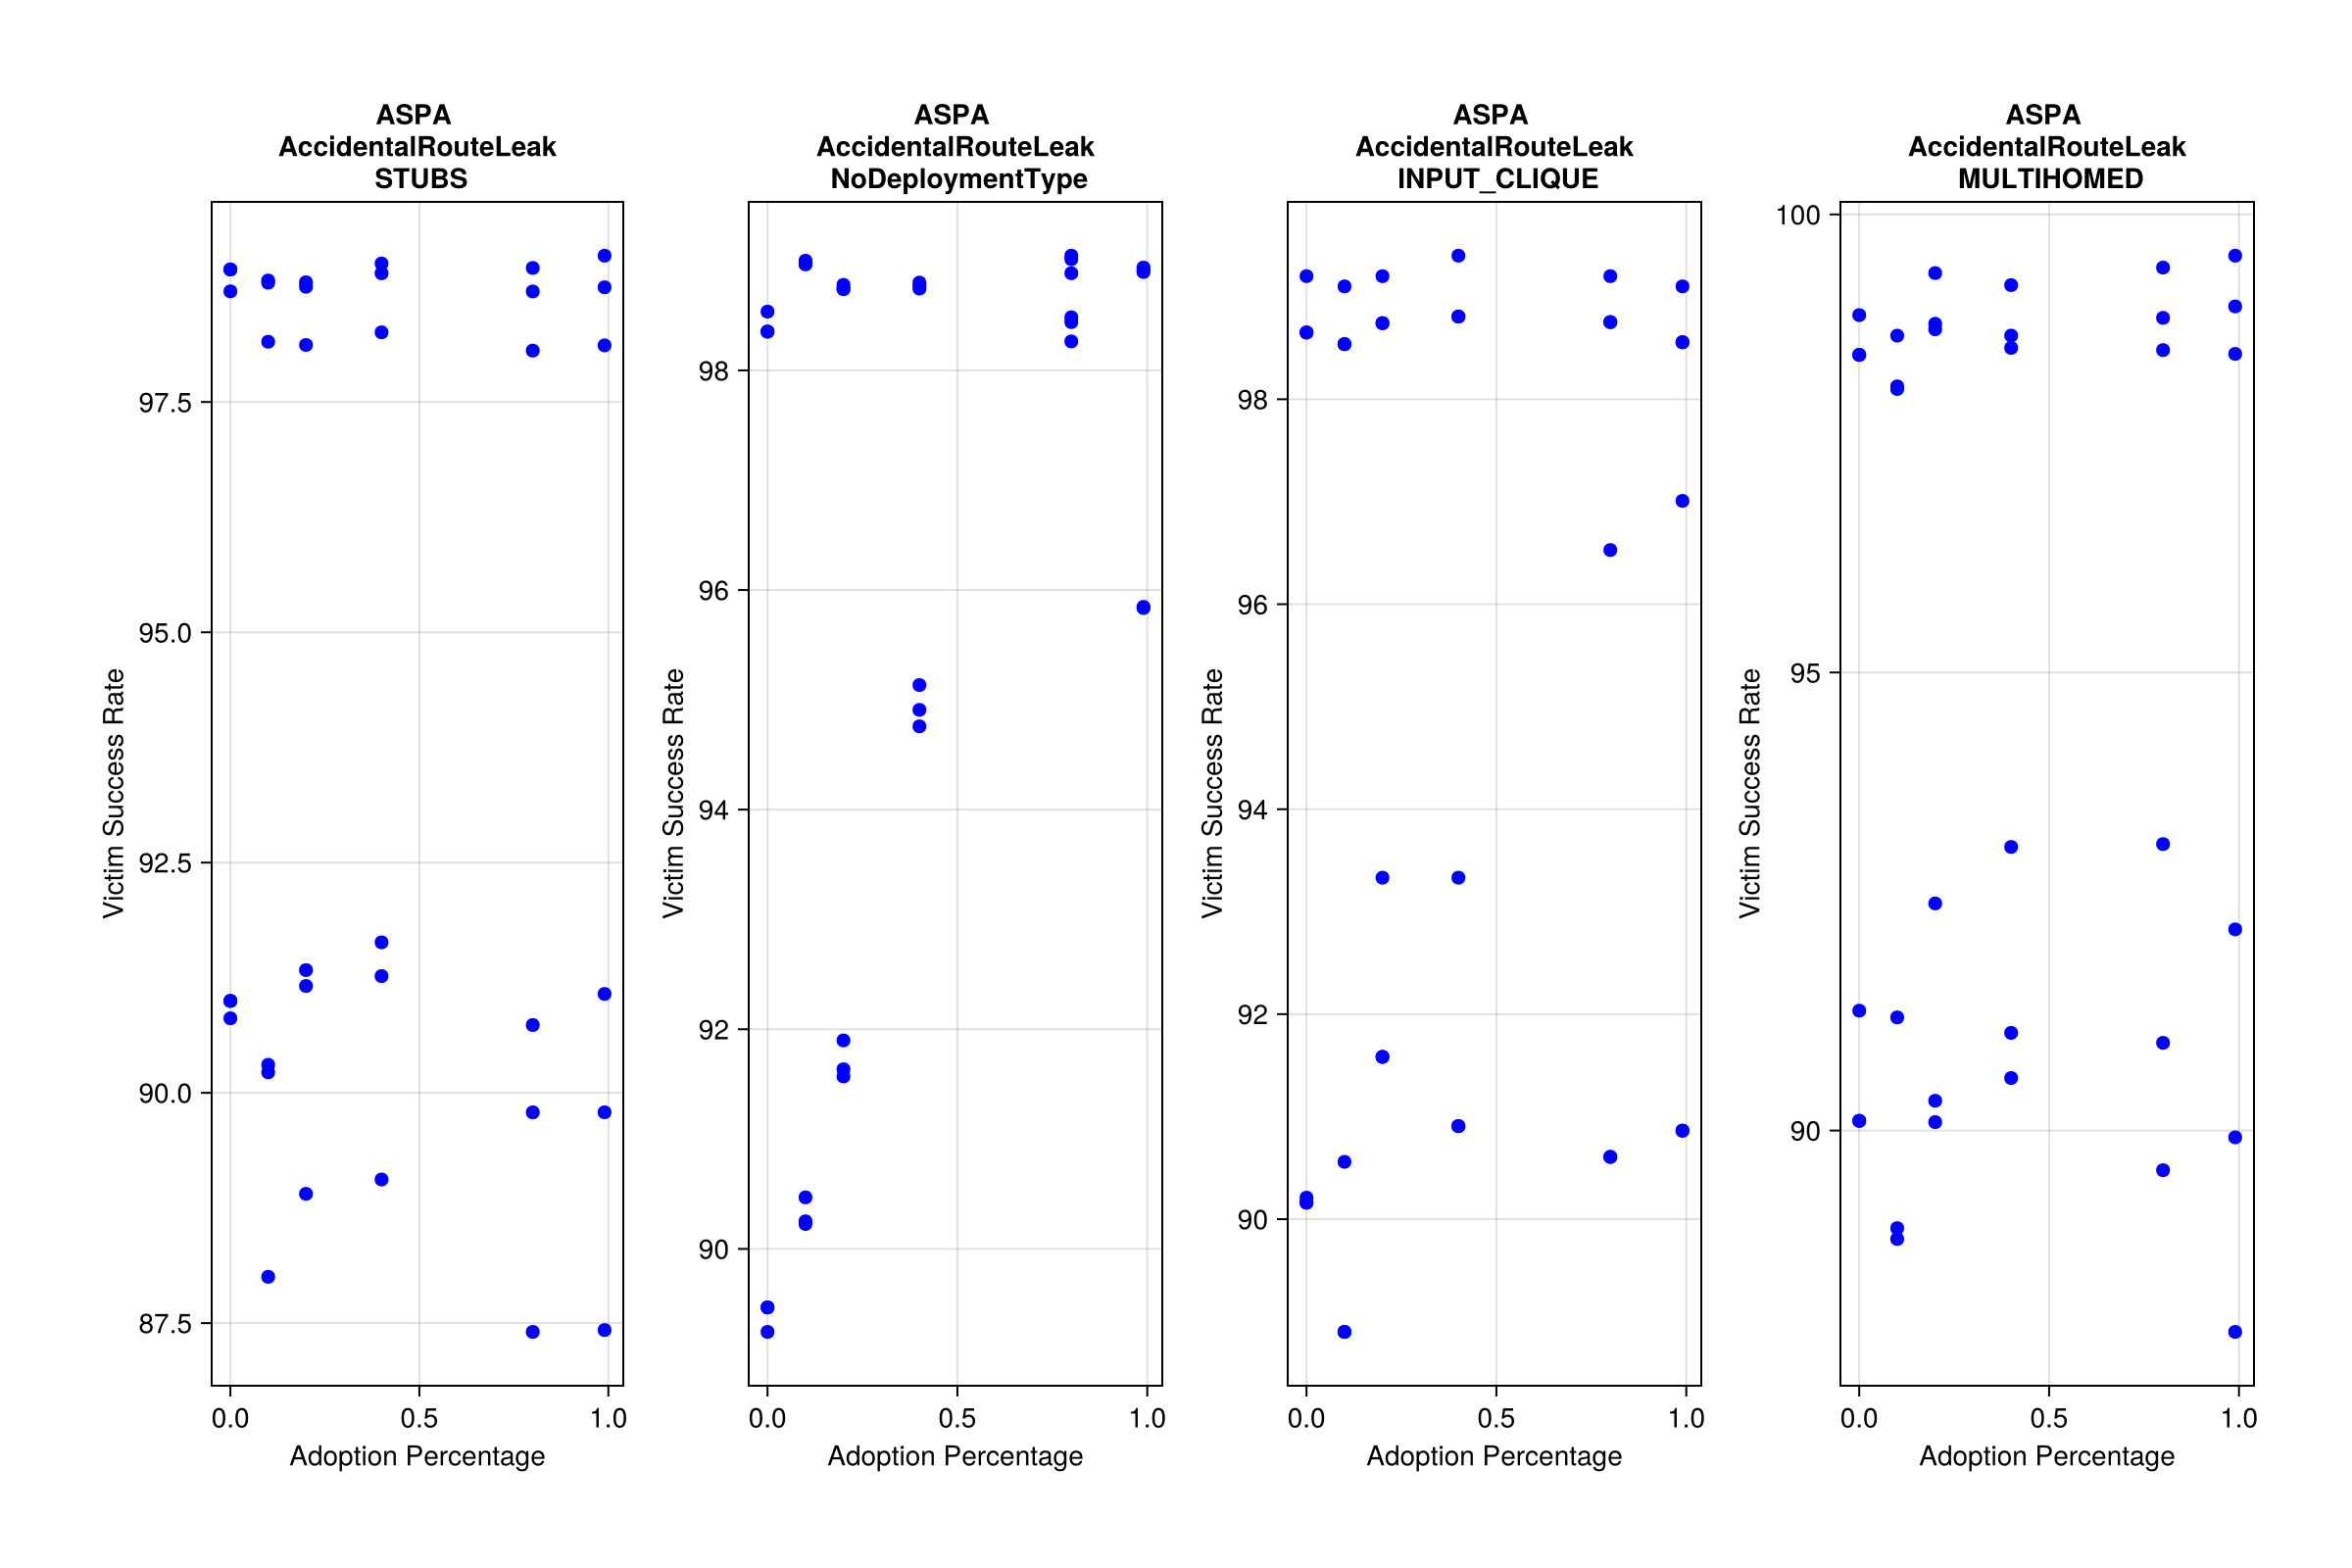

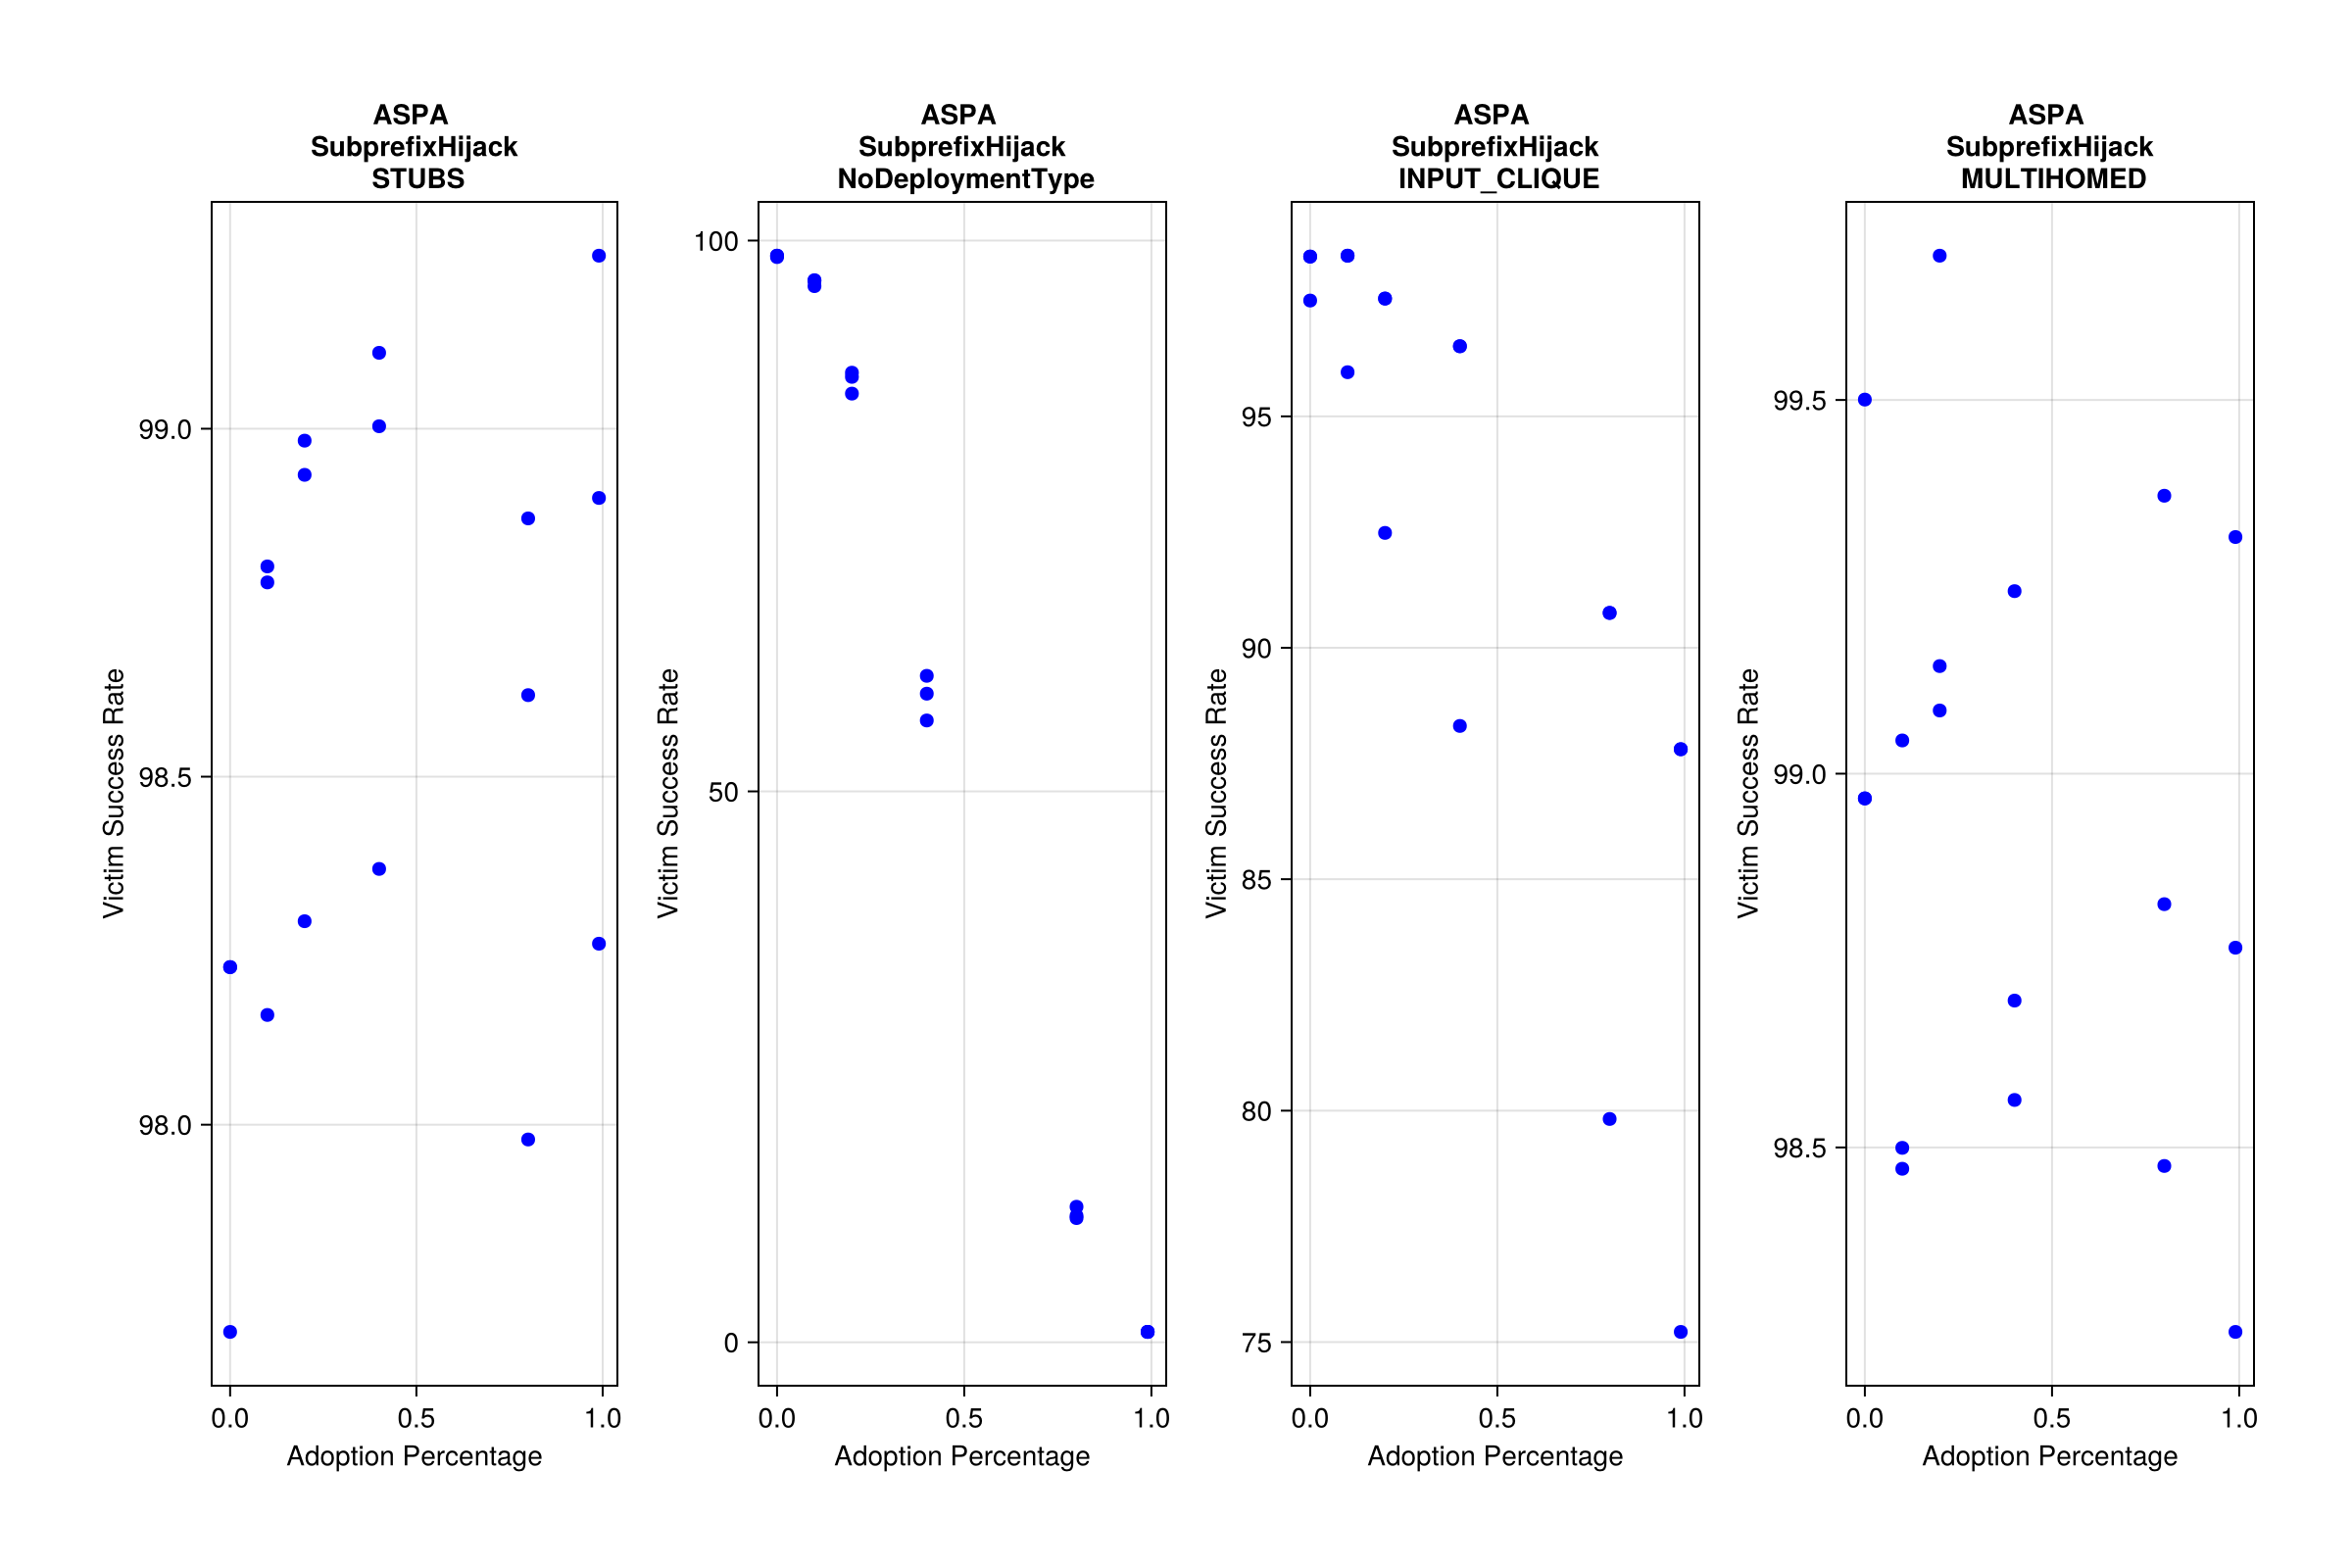

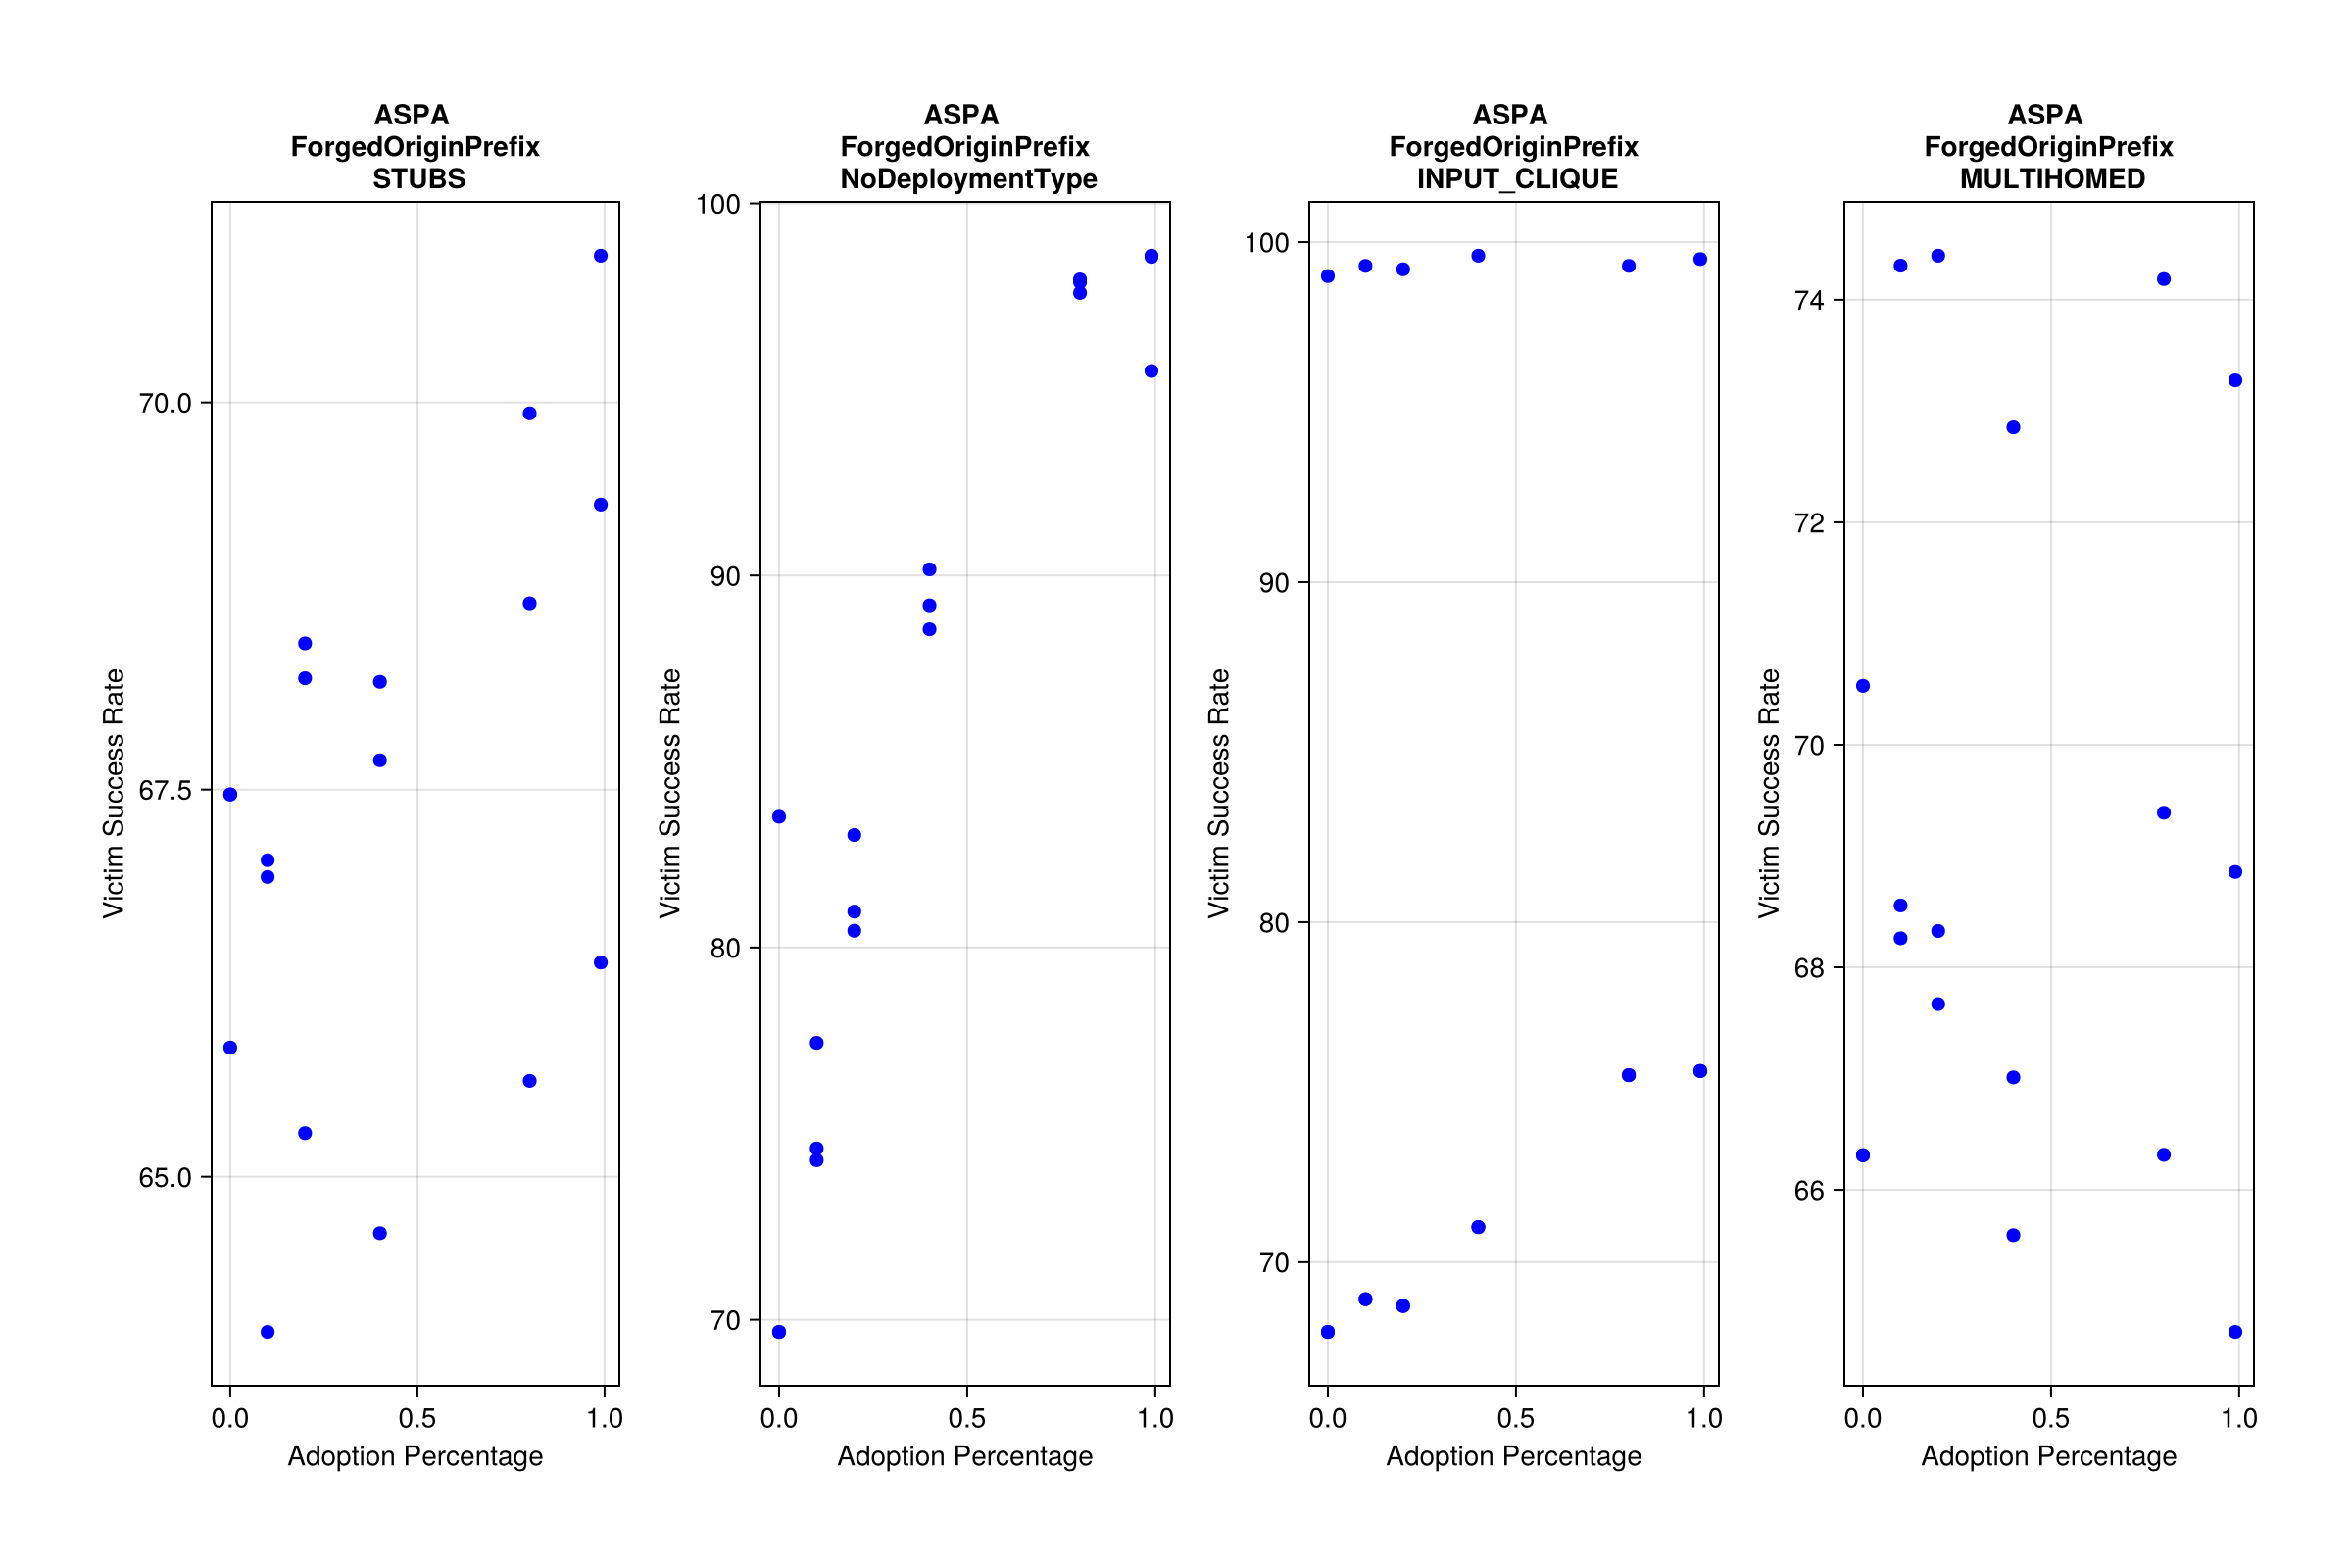

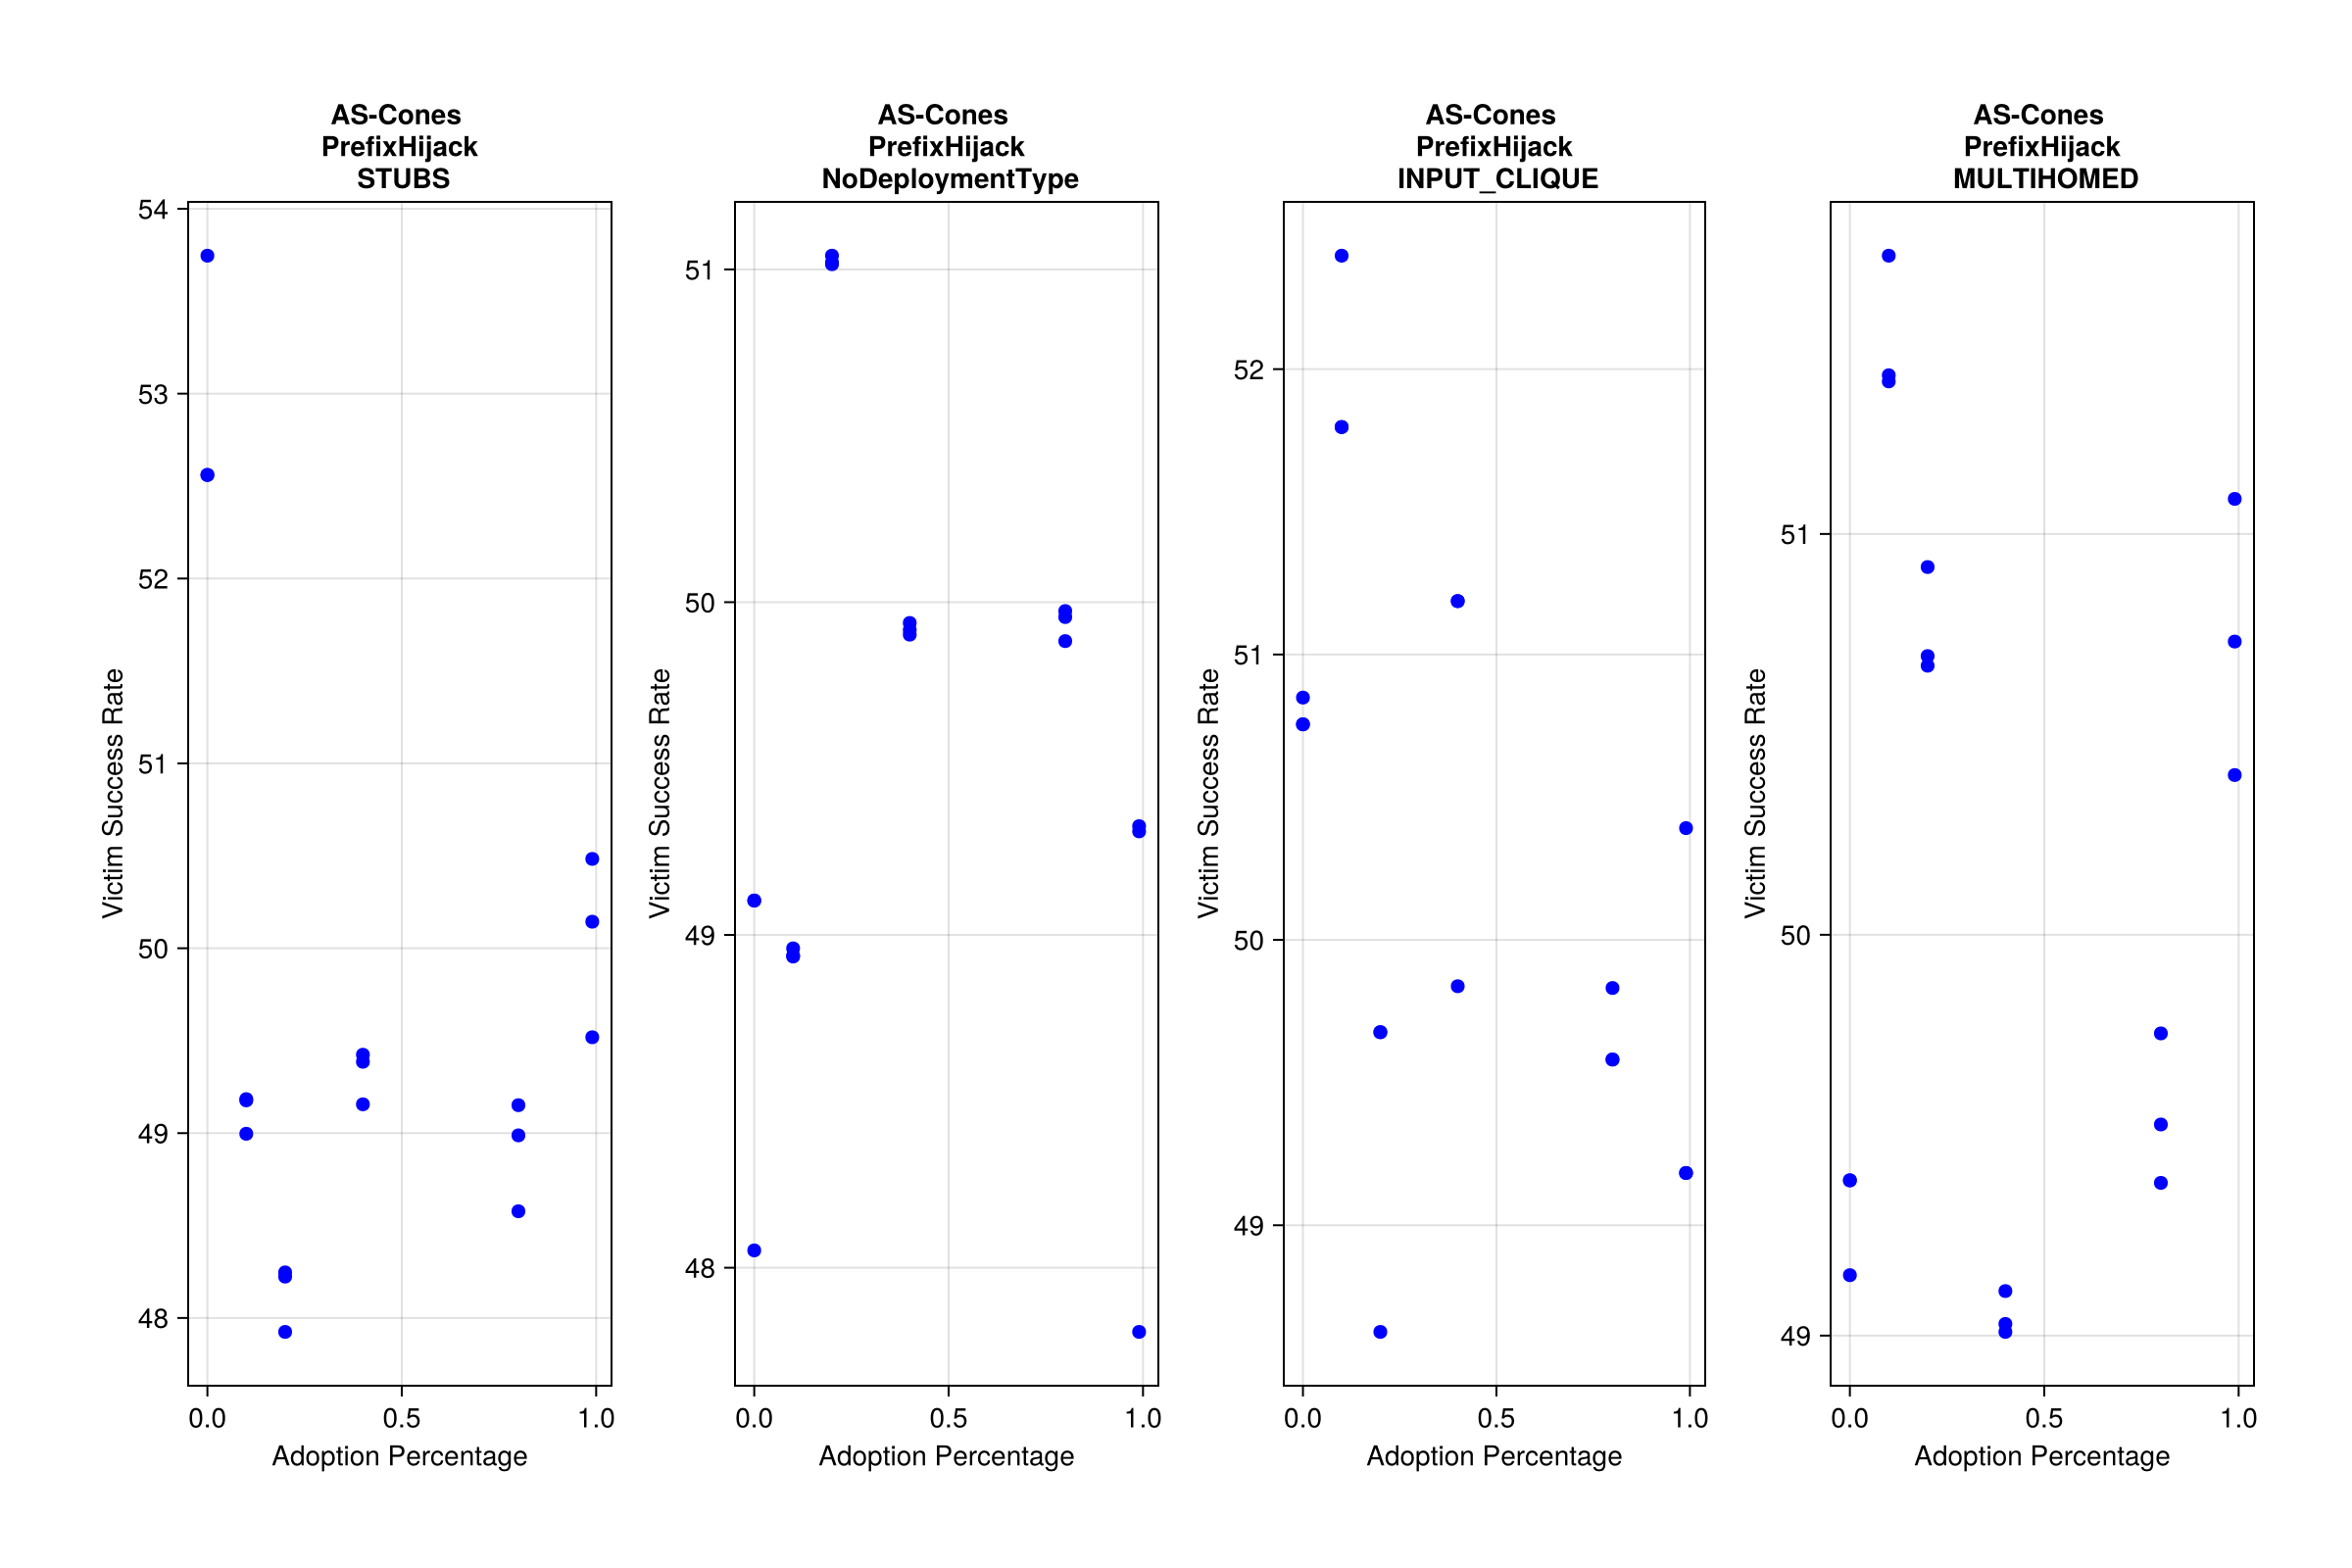

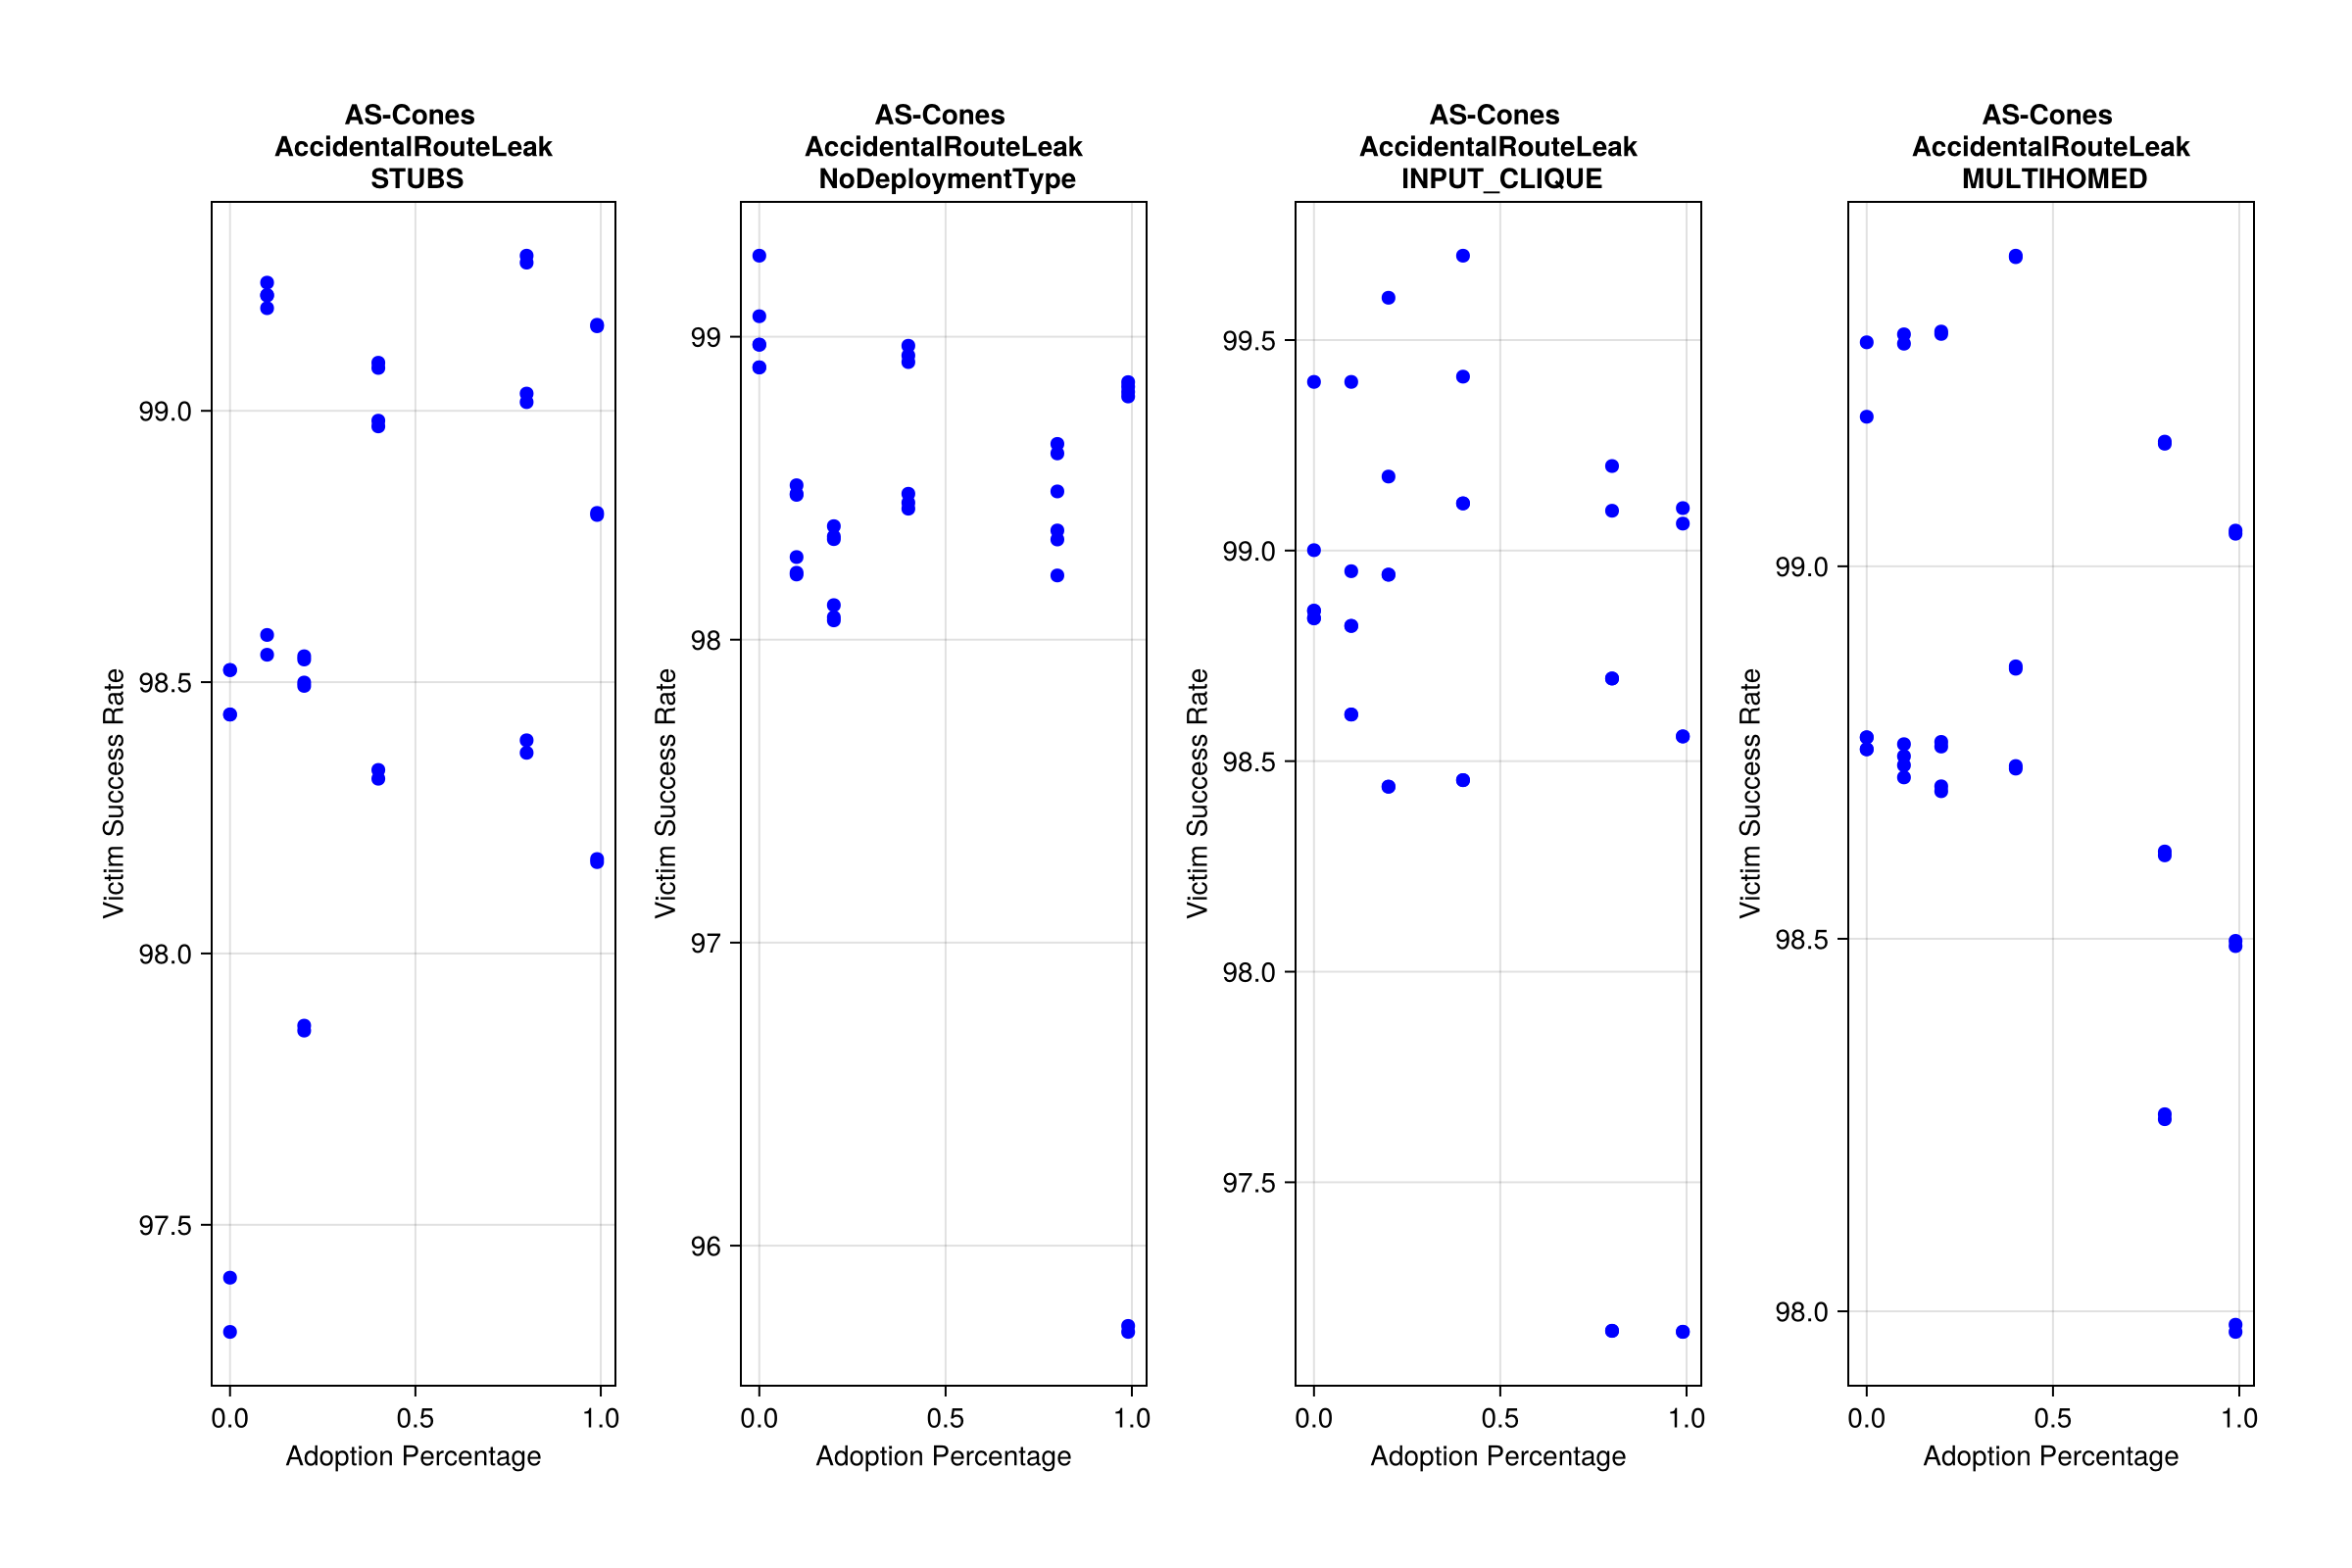

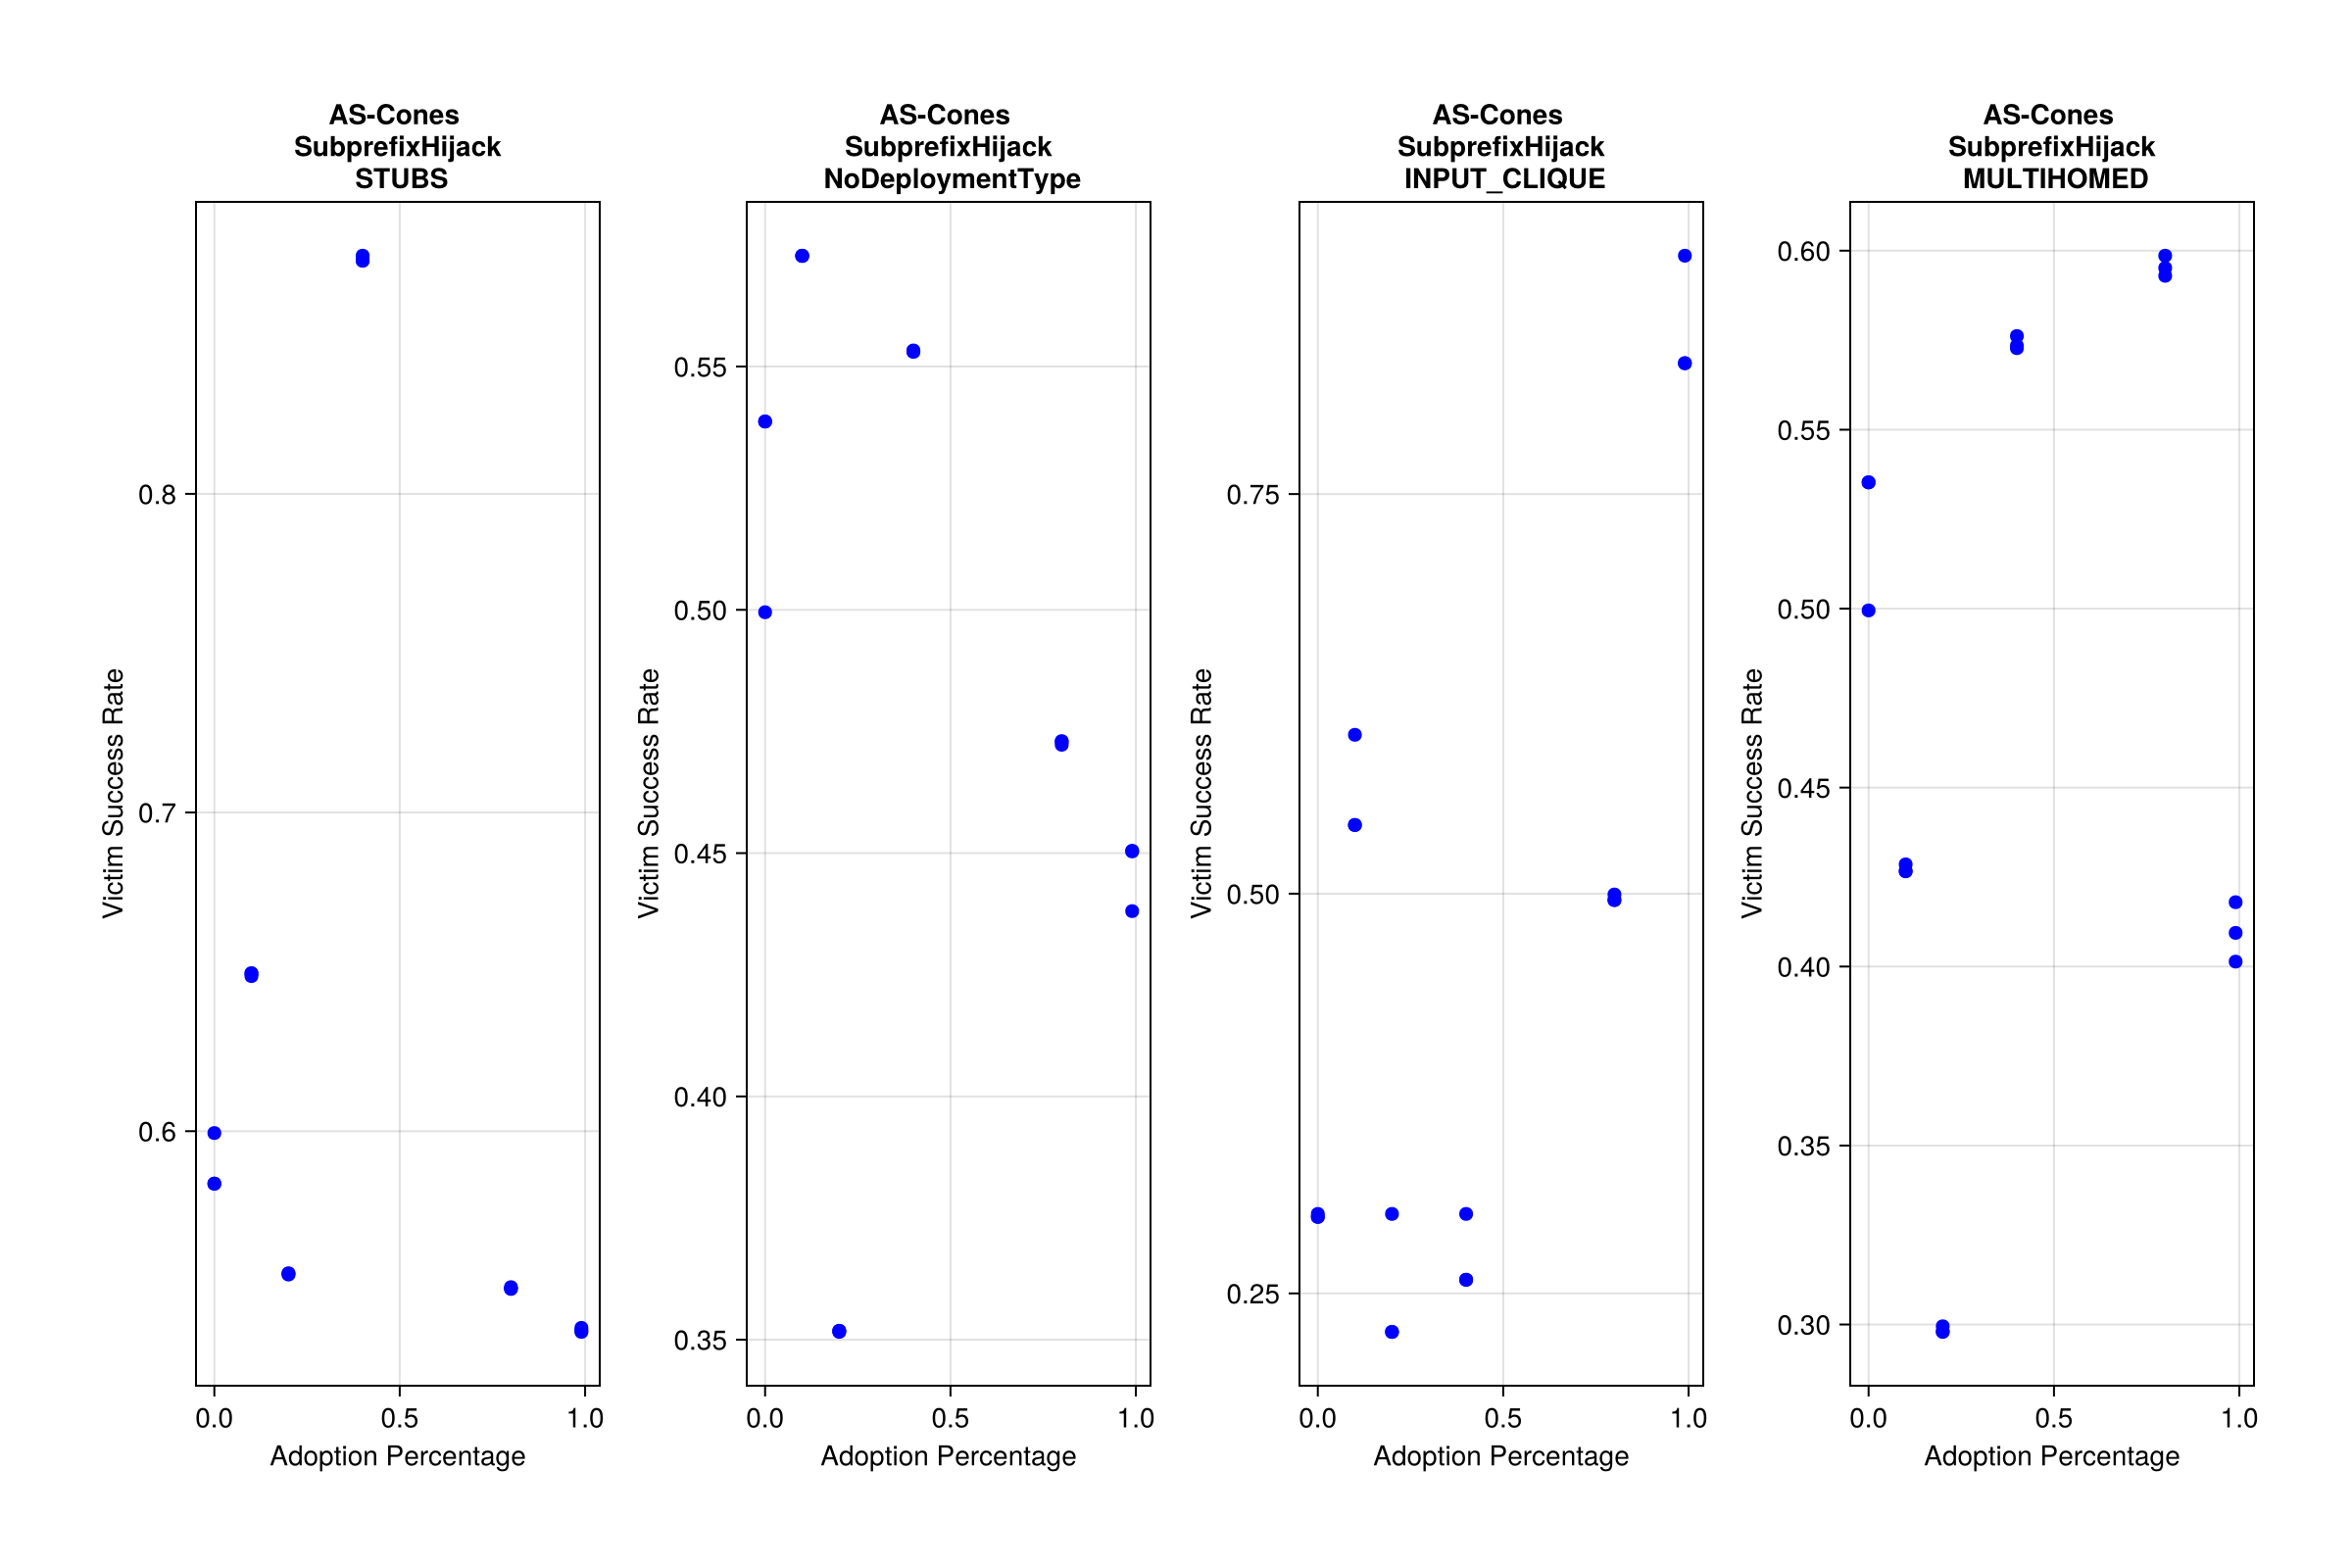

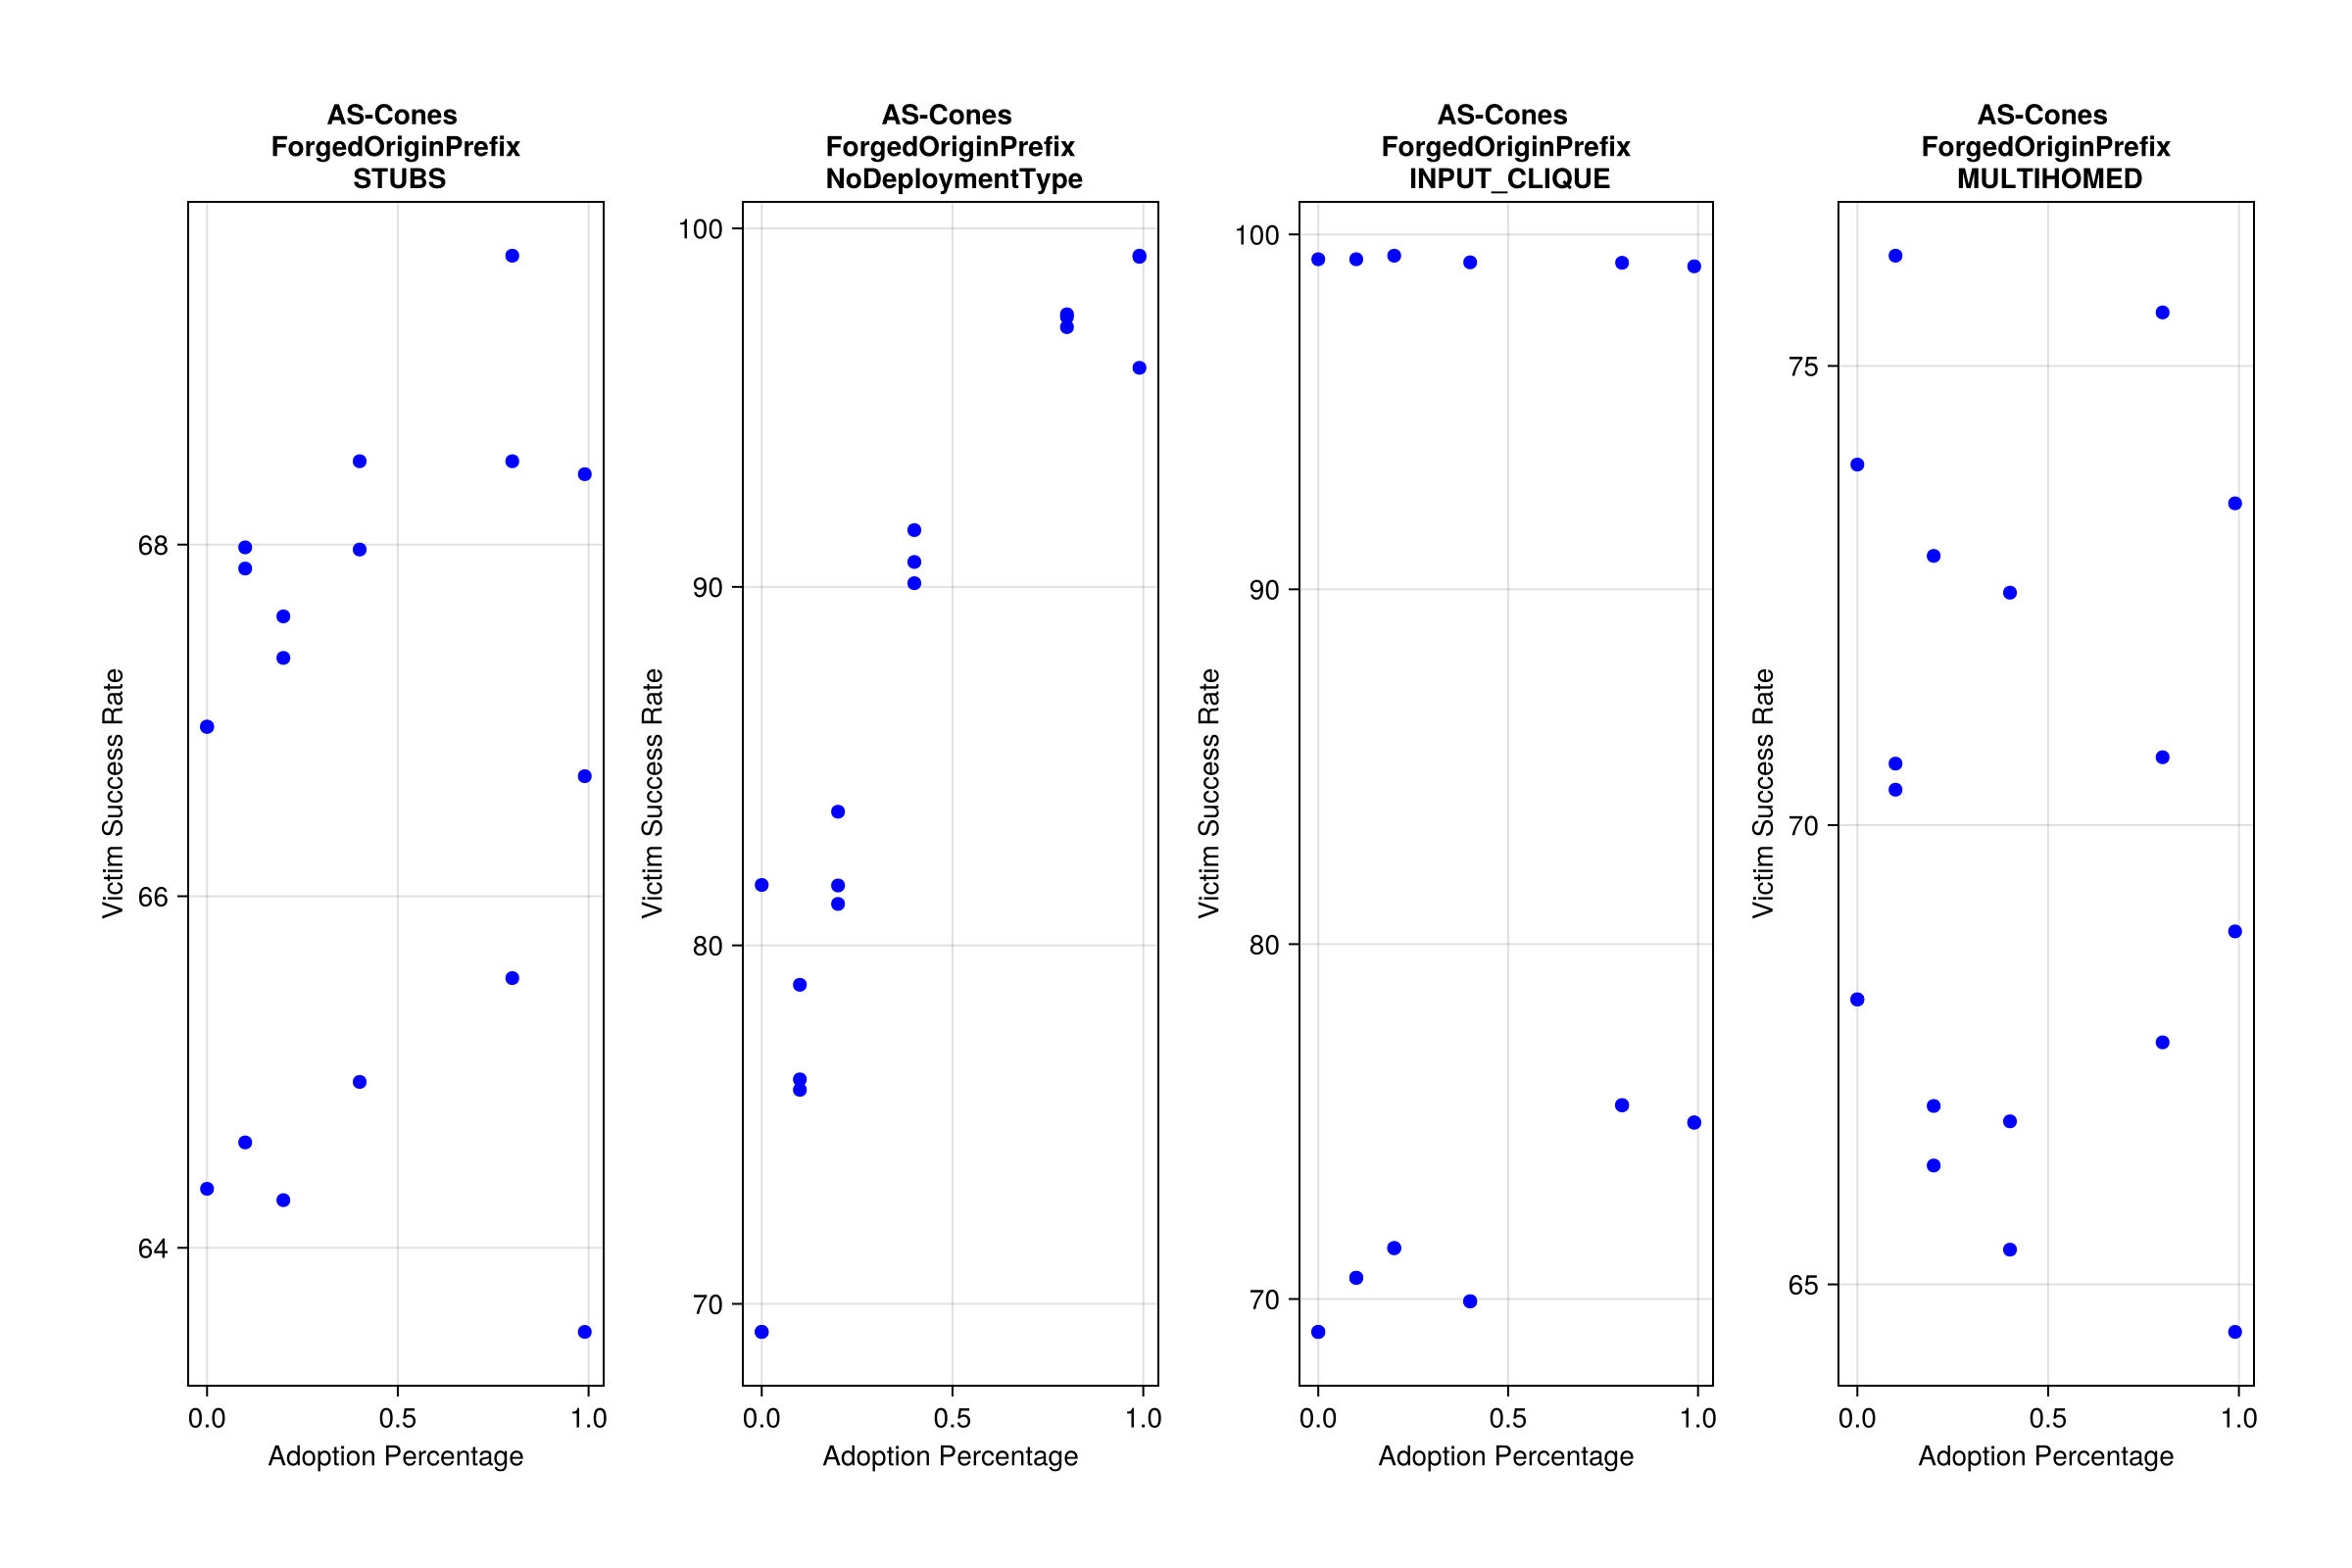

In [197]:
function generate_facet_grid(𝒟::DataFrame, policy::String, scenario::String, facet_dir::String)
    if nrow(𝒟) == 0
        println("No data for policy $policy and scenario $scenario")
        return
    end

    fig = Figure(size = (1200, 800), figure_padding=50)


    layout = fig[1, 1] = GridLayout()

    colgap!(layout, 150)

    for (i, dt) in enumerate(DEPLOYMENT_TYPE_MAP)
        filtered_𝒟 = 𝒟[𝒟.deployment_type .== dt[2], :]
        
        if isempty(filtered_𝒟)
            continue
        end

        ax = Axis(layout[1, i], title = "$(policy) \n $(scenario) \n $(dt[1])", xlabel = "Adoption Percentage", ylabel = "Victim Success Rate")
        Makie.scatter!(ax, filtered_𝒟.percent_adopt, filtered_𝒟.value, color = :blue, markersize = 10)
    end

    save(joinpath(facet_dir, "$(policy)_$(scenario)_facet_grid.png"), fig)
    # display(fig)
end
process_data(csv_path, "./facet_grids", generate_facet_grid)